In [1]:
import posydon

In [2]:
from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.simulationproperties import SimulationProperties
from posydon.binary_evol.flow_chart import flow_chart
from posydon.binary_evol.CE.step_CEE import StepCEE
from posydon.binary_evol.SN.step_SN import StepSN
from posydon.binary_evol.step_end import step_end
from posydon.binary_evol.MESA.step_mesa import CO_HeMS_step, MS_MS_step, CO_HMS_RLO_step
from posydon.binary_evol.DT.step_detached import detached_step
from posydon.binary_evol.DT.double_CO import DoubleCO
from posydon.binary_evol.simulationproperties import TimingHooks, StepNamesHooks

In [3]:
#Required imports for stiching
%matplotlib inline
import os
import pandas as pd
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches
import bokeh
import cv2
import os,sys
import colorsys

In [4]:
sim_kwargs = dict(
    flow = (flow_chart, {}),
    step_HMS_HMS = (MS_MS_step, {}),
    step_CO_HeMS = (CO_HeMS_step, {}),
    step_CO_HMS_RLO = (CO_HMS_RLO_step, {}),
    step_detached = (detached_step, {}),
    step_CE = (StepCEE, {}),
    step_SN = (StepSN, {}),
    step_dco = (DoubleCO, {}),
    step_end = (step_end, {}),
    extra_hooks = [(TimingHooks, {}), (StepNamesHooks, {})]
)

kwargs = dict(
    include_S1=True , # True, False
    S1_kwargs=dict(only_select_columns=[
                                        'state',
                                        #'metallicity',
                                        'mass',
                                        'log_R',
                                        'log_L',
                                        'lg_mdot',
                                        #'lg_system_mdot',
                                        #'lg_wind_mdot',
                                        'he_core_mass',
                                        'he_core_radius',
                                        #'c_core_mass',
                                        #'c_core_radius',
                                        #'o_core_mass',
                                        #'o_core_radius',
                                        'co_core_mass',
                                        'co_core_radius',
                                        'center_h1',
                                        'center_he4',
                                        #'center_c12',
                                        #'center_n14',
                                        #'center_o16',
                                        'surface_h1',
                                        'surface_he4',
                                        #'surface_c12',
                                        #'surface_n14',
                                        #'surface_o16',
                                        #'log_LH',
                                        #'log_LHe',
                                        #'log_LZ',
                                        #'log_Lnuc',
                                        #'c12_c12',
                                        #'center_gamma',
                                        #'avg_c_in_c_core',
                                        #'surf_avg_omega',
                                        'surf_avg_omega_div_omega_crit',
                                        #'total_moment_of_inertia',
                                        #'log_total_angular_momentum',
                                        'spin',
                                        #'conv_env_top_mass',
                                        #'conv_env_bot_mass',
                                        #'conv_env_top_radius',
                                        #'conv_env_bot_radius',
                                        #'conv_env_turnover_time_g',
                                        #'conv_env_turnover_time_l_b',
                                        #'conv_env_turnover_time_l_t',
                                        #'envelope_binding_energy',
                                        #'mass_conv_reg_fortides',
                                        #'thickness_conv_reg_fortides',
                                        #'radius_conv_reg_fortides',
                                        #'lambda_CE_1cent',
                                        #'lambda_CE_10cent',
                                        #'lambda_CE_30cent',
                                        #'lambda_CE_pure_He_star_10cent',
                                        #'profile',
                                        ]),

        optimize_ram= False,
        number_of_binaries = 100)

kwargs2 = dict(
    extra_columns=['step_names','step_times']
)
gen_info_columns = ['state',
                   'step_names',
                    'event',
                    'step_times',
                    'separation',
                    'orbital_period',
                    'eccentricity',
                    'rl_relative_overflow_1',
                    'rl_relative_overflow_2',
                    'lg_mtransfer_rate',
                    'mass_transfer_case',
                    'trap_radius',
                    'acc_radius',
                    't_sync_rad_1',
                    't_sync_conv_1',
                    't_sync_rad_2',
                    't_sync_conv_2',
                    'time'
                   ]
state_info_columns = ['binary_index', 'state','step_names','step_times',
                      'event','S1_state','S1_mass','S2_state','S2_mass',
                      'separation','orbital_period', 'eccentricity', 'time',
                      'S1_log_R', 'S1_log_L', 'S2_log_R','S2_log_L']

In [5]:
BinarySimulation= SimulationProperties(**sim_kwargs)
pop = BinaryPopulation(population_properties=BinarySimulation, **kwargs)
pop.evolve(breakdown_to_df=False, tqdm=True)

100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


SyntaxError: invalid syntax (4137457940.py, line 1)

In [6]:
DF = pop.to_df(**kwargs2)
DF = DF.rename_axis('binary_index').reset_index()
#bs_idx = df['binary_index'].unique()
print(DF.columns.tolist())

['binary_index', 'state', 'event', 'time', 'separation', 'orbital_period', 'eccentricity', 'rl_relative_overflow_1', 'rl_relative_overflow_2', 'lg_mtransfer_rate', 'mass_transfer_case', 'trap_radius', 'acc_radius', 't_sync_rad_1', 't_sync_conv_1', 't_sync_rad_2', 't_sync_conv_2', 'nearest_neighbour_distance', 'step_names', 'step_times', 'V_sys_x', 'V_sys_y', 'V_sys_z', 'S1_state', 'S1_metallicity', 'S1_mass', 'S1_log_R', 'S1_log_L', 'S1_lg_mdot', 'S1_lg_system_mdot', 'S1_lg_wind_mdot', 'S1_he_core_mass', 'S1_he_core_radius', 'S1_c_core_mass', 'S1_c_core_radius', 'S1_o_core_mass', 'S1_o_core_radius', 'S1_co_core_mass', 'S1_co_core_radius', 'S1_center_h1', 'S1_center_he4', 'S1_center_c12', 'S1_center_n14', 'S1_center_o16', 'S1_surface_h1', 'S1_surface_he4', 'S1_surface_c12', 'S1_surface_n14', 'S1_surface_o16', 'S1_log_LH', 'S1_log_LHe', 'S1_log_LZ', 'S1_log_Lnuc', 'S1_c12_c12', 'S1_center_gamma', 'S1_avg_c_in_c_core', 'S1_surf_avg_omega', 'S1_surf_avg_omega_div_omega_crit', 'S1_total_mom

In [7]:
#Visualization View Gives me the Necessary information to make the visualizations 
VisualizationView=DF[state_info_columns]
VisualizationView

,binary_index,state,step_names,step_times,event,S1_state,S1_mass,S2_state,S2_mass,separation,orbital_period,eccentricity,time,S1_log_R,S1_log_L,S2_log_R,S2_log_L
0,0,detached,initial_cond,0,ZAMS,H-rich_Core_H_burning,15.642,H-rich_Core_H_burning,2.6408,23.884,3.16344,0,9.56867e+08,NaN,NaN,NaN,NaN
1,0,contact,step_HMS_HMS,8.06029,oCE1,H-rich_Core_H_burning,14.8531,H-rich_Core_H_burning,2.70147,16.7891,1.90268,0,9.68454e+08,0.954908,3.54491,0.627965,3.23254
2,0,merged,step_CE,8.96454e-05,NaN,H-rich_Core_H_burning,17.5545,H-rich_Core_H_burning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,merged,step_end,5.96046e-05,END,H-rich_Core_H_burning,17.5545,H-rich_Core_H_burning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,detached,initial_cond,0,ZAMS,H-rich_Core_H_burning,8.16915,H-rich_Core_H_burning,4.7136,384.821,243.727,0,1.11486e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,98,merged,step_end,4.43459e-05,END,H-rich_Core_H_burning,21.6162,H-rich_Core_H_burning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,99,detached,initial_cond,0,ZAMS,H-rich_Core_H_burning,7.9936,H-rich_Core_H_burning,7.05063,1515.45,1762.57,0,1.36866e+10,NaN,NaN,NaN,NaN
451,99,detached,step_HMS_HMS,0.0430872,CC1,H-rich_Central_C_depletion,4.09651,H-rich_Core_H_burning,7.14205,2321.75,3867.12,0,1.37308e+10,2.84645,4.67565,0.903415,3.63484
452,99,disrupted,step_SN,0.000438929,NaN,NS,1.15069,H-rich_Core_H_burning,7.14205,NaN,NaN,NaN,1.37308e+10,NaN,NaN,0.903415,3.63484


In [8]:
print(VisualizationView)

     binary_index      state    step_names   step_times event  \
0               0   detached  initial_cond            0  ZAMS   
1               0    contact  step_HMS_HMS      8.06029  oCE1   
2               0     merged       step_CE  8.96454e-05   NaN   
3               0     merged      step_end  5.96046e-05   END   
4               1   detached  initial_cond            0  ZAMS   
..            ...        ...           ...          ...   ...   
449            98     merged      step_end  4.43459e-05   END   
450            99   detached  initial_cond            0  ZAMS   
451            99   detached  step_HMS_HMS    0.0430872   CC1   
452            99  disrupted       step_SN  0.000438929   NaN   
453            99  disrupted      step_end  4.95911e-05   END   

                       S1_state  S1_mass               S2_state  S2_mass  \
0         H-rich_Core_H_burning   15.642  H-rich_Core_H_burning   2.6408   
1         H-rich_Core_H_burning  14.8531  H-rich_Core_H_burning  2.

In [9]:

import pandas as pd
stellartemps = pd.read_csv('Visualization_Data/Stellar_Temperature/Teff_RGB_Hex.csv')
stellartemps



,T_{eff},RGB,Hex \\ \hline
0,2300,"1.0,0.409,0.078",\#ff6813 \\
1,2400,"1.0,0.432,0.093",\#ff6e17 \\
2,2500,"1.0,0.455,0.109",\#ff731b \\
3,2600,"1.0,0.476,0.126",\#ff7920 \\
4,2700,"1.0,0.497,0.144",\#ff7e24 \\
...,...,...,...
68,11200,"0.577,0.667,1.0",\#93aaff \\
69,11400,"0.57,0.662,1.0",\#91a8ff \\
70,11600,"0.563,0.657,1.0",\#8fa7ff \\
71,11800,"0.557,0.652,1.0",\#8da6ff \\


In [10]:
#Iterator Function Getstar
#This function retrieves a specific index(star in the population) from the mother DataFrame returned from the population synthesis and 
#creates a minidataframe that has information based on the specific index.

import pandas as pd
#df = DF.rename_axis('binary_index').reset_index() #always comment out after you run so you don't create another column
def getstar(indx): 
    data = DF.loc[DF['binary_index']==indx]
    return pd.DataFrame(data)
minidataframe = getstar(90) #99 is interesting 
MiniVizView=minidataframe[state_info_columns]
MiniVizView

,binary_index,state,step_names,step_times,event,S1_state,S1_mass,S2_state,S2_mass,separation,orbital_period,eccentricity,time,S1_log_R,S1_log_L,S2_log_R,S2_log_L
409,90,detached,initial_cond,0,ZAMS,H-rich_Core_H_burning,26.8405,H-rich_Core_H_burning,15.0958,14.9676,1.03622,0,1.08066e+10,NaN,NaN,NaN,NaN
410,90,initial_RLOF,step_HMS_HMS,0.019702,NaN,H-rich_Core_H_burning,NaN,H-rich_Core_H_burning,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
411,90,initial_RLOF,step_end,4.72069e-05,END,H-rich_Core_H_burning,NaN,H-rich_Core_H_burning,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [11]:

Luminosity1=np.array([0])
Radius1=np.array([0])
Temperature_array=[]

def Temperature(Luminosity, Radius):
    Luminosity=10**Luminosity*3.85e33
    print(Luminosity)#W-.erg*s^-1
    rad=10**Radius*6.957e10 #solarradii->cm
    print(rad)
    sig=5.6705e-5 #stephen boltzmann constant
    A=4*np.pi*(rad)**2
    Temperature=(Luminosity/(sig*A))**(1/4)
    Temperature_array.append(Temperature)
    return Temperature
Temperature(Luminosity1,Radius1)
print('K:',Temperature_array)

[3.85e+33]
[6.957e+10]
K: [array([5780.24672081])]


385
ZAMS
<class 'str'>
timecolumn: 2111839918.645049
<class 'float'>
nan
nan
nan
nan
Star1: nan nan Star2: nan nan
386
oCE1
<class 'str'>
timecolumn: 2117200513.8302891
<class 'numpy.float64'>
2.8749044079373247e+38
725628609147.1259
1.0153715338830532e+36
207456766032.67328
Star1: 4.873162679240444 1.018292393833572 Star2: 2.4211642542096774 0.47450560019749044
387
nan
<class 'float'>
timecolumn: nan
<class 'float'>
!
nan
nan
nan
nan
Star1: nan nan Star2: nan nan
merged_step_CE.jpg
388
END
<class 'str'>
timecolumn: nan
<class 'float'>
nan
nan
nan
nan
Star1: nan nan Star2: nan nan
['H-rich_Core_H_burning_H-rich_Core_H_burning_ZAMS.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burning_oCE1.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burningmerged_step_CE.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burningEnd_Merged.jpg'] [nan, 29586.313099284307, nan, nan] [nan, 13489.1517200926, nan, nan]
4
['H-rich_Core_H_burning_H-rich_Core_H_burning_ZAMS.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burning

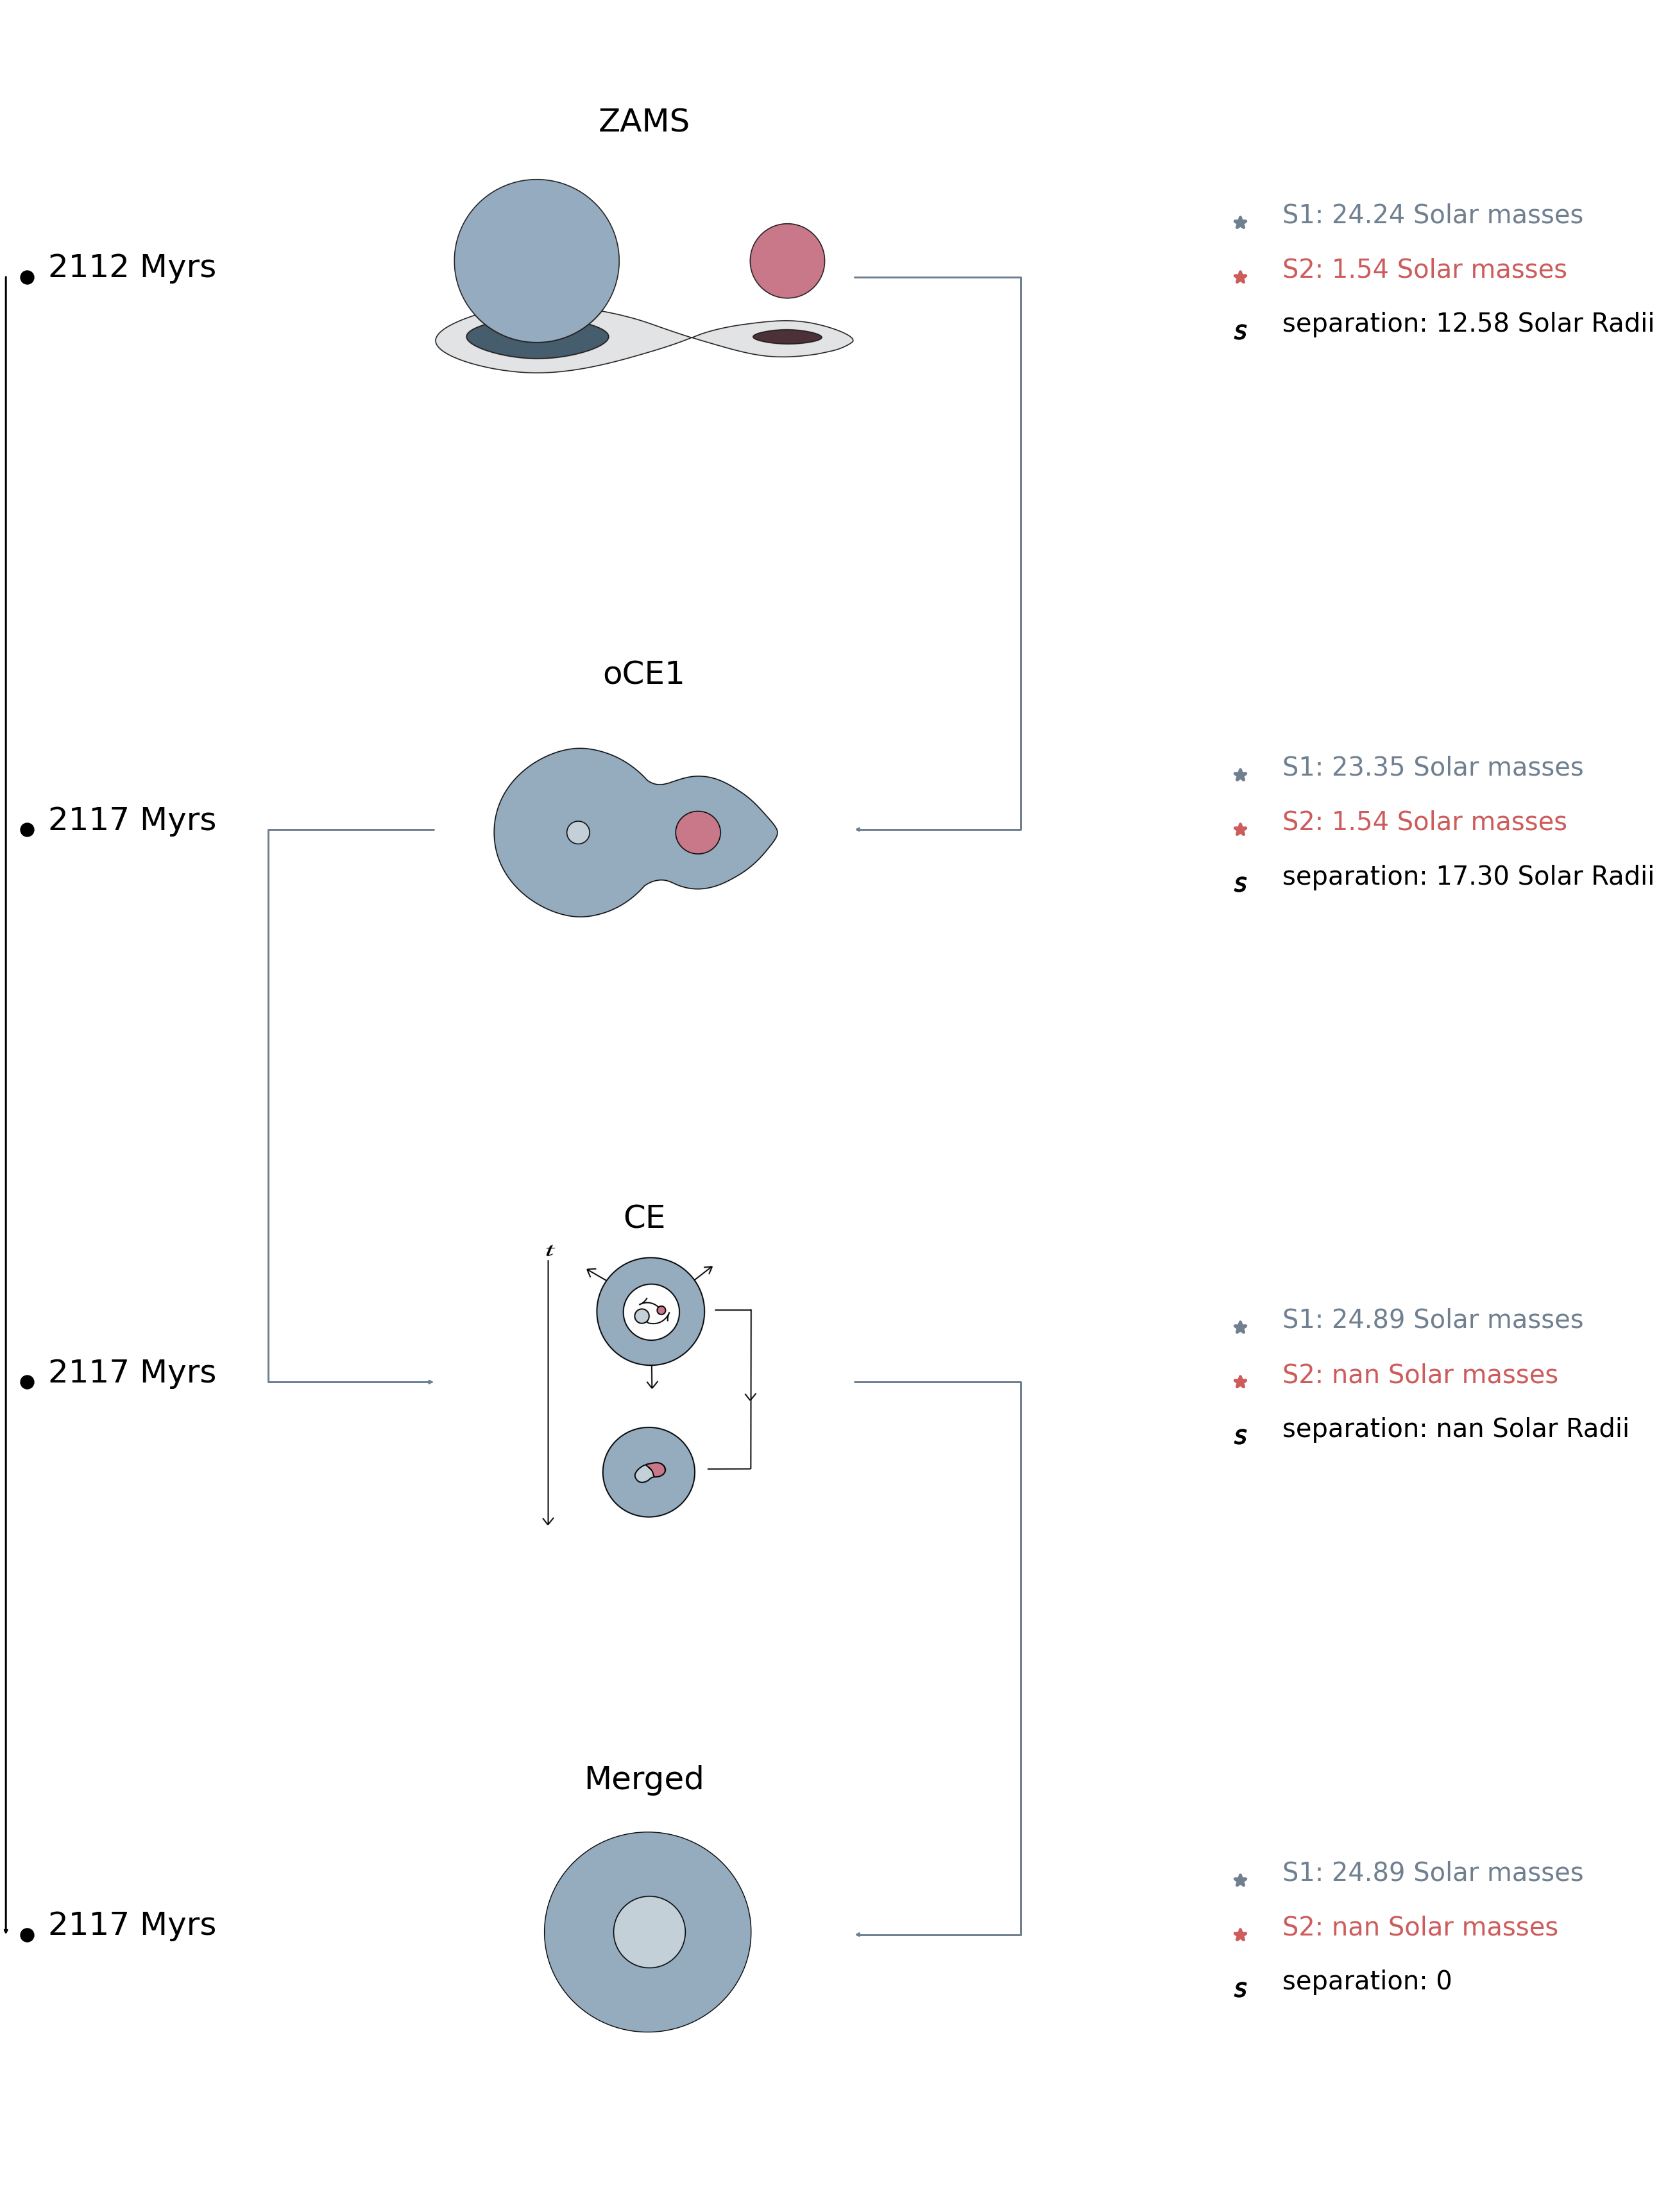

In [38]:
#!!!
from matplotlib.markers import MarkerStyle
import mplcursors

def chartobject(ax, img, fontsize=12): 
                ax.imshow(img)
                ax.locator_params(nbins=3)
#def temperaturefilter(S1_mass,S2_mass)
            
def getimage(dataframe): 
    plot_array=[]
    step_array=[]
    step_times=[] 
    temp_arrayS1=[]
    temp_arrayS2=[]
    mass_arrayS1=[]
    mass_arrayS2=[]
    separation_array=[]
    # Iterate over the indices in the DataFrame
    for n,index in enumerate(dataframe.index):
        # Get the filename based on the column
        filename = f"{dataframe['state'][index]}"+"_"+ f"{dataframe['step_names'][index]}"+"_"+ f"{dataframe['event'][index]}"+"_"+ f"{dataframe['S1_state'][index]}"+"_"+ f"{dataframe['S2_state'][index]}.jpg"  
        #print(filename)
        print(index)
        print(dataframe['event'][index])
        print(type(dataframe['event'][index]))
        print('timecolumn:',dataframe['time'][index])
        print(type(dataframe['time'][index]))
        if pd.isnull(dataframe['time'][index]):# if the step times column is NaN then it will just write the last column's info 
            step_times.append(step_times[n-1])  
        else: 
            step_times.append(f"{dataframe['time'][index]/1e6:.0f} Myrs")
                              
        if dataframe['event'][index]=='ZAMS': #if the functions reads ZAMS (event)
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"ZAMS.jpg") 
            step_array.append(f"{dataframe['step_names'][index]}")
            #step_times.append(f"{dataframe['time'][index]/1e6:.0f} myrs")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))  
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
        
        if dataframe['state'][index]=='RLOF': #if the functions reads RLOF (state)
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"RLOF.jpg")
            step_array.append(f"{dataframe['step_names'][index]}")
            #step_times.append(f"{dataframe['time'][index]/1e6:.0f} myrs")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
       
        if dataframe['state'][index]=='RLO1': #if the function reads RLO1 (state)
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"RLO1.jpg")
            step_array.append(f"{dataframe['step_names'][index]}")
           # step_times.append(f"{dataframe['time'][index]/1e6:.0f} myrs")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
        
        if dataframe['event'][index]=='oCE1': #if the function reads oCEI (event)
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"oCE1.jpg")
            step_array.append(f"{dataframe['step_names'][index]}")
            #step_times.append(f"{dataframe['time'][index]/1e6:.0f} myrs")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
        
        if dataframe['event'][index]=='END':#this one is the merged image
            string='End'
            step_times.append(f"{dataframe['time'][index]}")
            if dataframe['state'][index]=='merged':
                starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
                plot_array.append(starstate+string+'_'+"Merged.jpg") #format: star1_star2_End_Merged.jpg
                #step_times.append(f"{dataframe['time'][index]}")
                temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
                temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
                mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
                mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
                print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
            elif dataframe['state'][index]=='disrupted':
                starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
                plot_array.append(starstate+string+'_'+'disrupted.jpg') #format: star1_star2_End_disrupted.jpg
                #step_times.append(f"{dataframe['time'][index]}")
                temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
                temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))  
                mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
                mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
                print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
                
        #if (dataframe['S1_mass'][index]>0.6)&(dataframe['S1_mass'][index]<0.8):

                              
        if dataframe['event'][index]=='CC1': #if the function reads CC1 (event)
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"CC1.jpg") #format: Star1_star2_CC1.jpg
            step_array.append(f"{dataframe['step_names'][index]}")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
        
        if dataframe['event'][index]=='oRLOF2': #if the functions reads oRLOF2 state
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"oRLOF2.jpg")
            step_array.append(f"{dataframe['step_names'][index]}")
            step_times.append(f"{dataframe['time'][index]/1e6:.0f} Myrs")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
       
        if dataframe['state'][index]=='RLO2': #if the function reads RLO2 (state)
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            plot_array.append(starstate+'_'+"RLO2.jpg")
            step_array.append(f"{dataframe['step_names'][index]}")
            step_times.append(f"{dataframe['time'][index]/1e6:.0f} Myrs")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
        
        #For null columns 
        
        if pd.isnull(dataframe['event'][index]):# if the event column is NaN then it will go to the state column
            print('!')
            starstate=f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            newname=f"{dataframe['state'][index]}" + "_" + f"{dataframe['step_names'][index]}.jpg"
            step_array.append(f"{dataframe['step_names'][index]}")
            #step_times.append(f"{dataframe['time'][index]}")
            temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index],dataframe['S1_log_R'][index]))
            temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index],dataframe['S2_log_R'][index]))
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
            separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
            print('Star1:', dataframe['S1_log_L'][index],dataframe['S1_log_R'][index],
                              'Star2:', dataframe['S2_log_L'][index],dataframe['S2_log_R'][index])
            print(newname)
            plot_array.append(starstate+newname) #format:Star1_star2_state_stepname
        
        if pd.isnull(dataframe['separation'][index]):#if seperation column is NaN
            separation_array.append(f"{0}")
        
    print(plot_array,temp_arrayS1,temp_arrayS2)
    return plot_array,step_array,step_times,temp_arrayS1,temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array

                              
                              
            

def vdh(plot_array,step_array,step_times, mass_array_S1, mass_array_S2, separation_array, dataframe): 
    gs1 = gridspec.GridSpec(len(plot_array), 3)
    print(len(plot_array))
    print(plot_array)
    fig = plt.figure(tight_layout=True, figsize=(12*3,12*len(plot_array))) 
    axes_array=[]
    axes2_array=[]                              
    for n,filename in enumerate(plot_array):
        image_path = os.path.join('Visualization_Data', filename)
                              
        if os.path.exists(image_path):

            
            # Open and display the image with istich 
            im = Image.open(image_path)  
            img1 = np.array(im)
            
                        
                                  
            #imgpath = np.asarray(Image.open(image_path))
            #img=cv2.imread(image_path)
            #print(repr(imgpath))

            #img = imgpath[:, :, 0]
            #RGB_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            title=filename.split(".")[0].split('_')[-1] #different titles will be placed
            ax = fig.add_subplot(gs1[n, 1])
            ax2 = fig.add_subplot(gs1[n,0])
            ax3= fig.add_subplot(gs1[n,2])
            axes_array.append(ax)  # Add the current ax to the list
            axes2_array.append(ax2)
            ax.set_title(title, fontsize=50) 
            chartobject(ax, img1)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['left'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            plt.setp(ax3.get_xticklabels(), visible=False)
            plt.setp(ax3.get_yticklabels(), visible=False)
            ax3.tick_params(labelbottom=False, left=False, labelleft=False,  bottom=False)
            ax3.spines['right'].set_visible(False)
            ax3.spines['top'].set_visible(False)
            ax3.spines['left'].set_visible(False)
            ax3.spines['bottom'].set_visible(False)
            #ax2.set_xlimit(0,5)
            label = f"{step_times[n]}" # Customize the annotation text as needed
            label2=f"S1: {mass_arrayS1[n]}"
            label3=f"S2: {mass_arrayS2[n]}"
            label4=f"separation: {separation_array[n]}"
            ax2.text(0.1,0.5, label, color='black',size=50,transform=ax2.transAxes)
            ax2.scatter(0.05,0.5, color='black',transform=ax2.transAxes,marker='o', s=300, facecolor='black',linewidth=5)
            ax3.text(1,0.6, label2, color='slategrey', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.5, label3, color='indianred', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.4, label4, color='black', fontsize=40,transform=ax3.transAxes)                    
            ax3.scatter(0.9,0.6, color='slategrey',transform=ax3.transAxes,marker='*', s=300, facecolor='slategrey',linewidth=5)
            ax3.scatter(0.9,0.5, color='indianred',transform=ax3.transAxes,marker='*', s=300, facecolor='indianred',linewidth=5) 
            ax3.scatter(0.9,0.4, color='black',transform=ax3.transAxes,marker='$S$', s=500, facecolor='black',linewidth=2)
                                          #ha='right', va='center')

            #ax2.scatter()
            
            #ax2 = fig.add_subplot(gs1[2])
            #plt.setp(ax2.get_xticklabels(), visible=False)
            #plt.setp(ax2.get_yticklabels(), visible=False)
            #ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            #ax2.spines['right'].set_visible(False)
            #ax2.spines['top'].set_visible(False)
            #ax2.spines['left'].set_visible(False)
            #ax2.spines['bottom'].set_visible(False)



        else:
            print(f"Image file {filename} not found in the database.")
    rightbar='bar,fraction=-0.3'
    leftbar='bar,fraction=0.3'
    for i,ax in enumerate(axes_array[:-1]):
        if i%2==0:
            xy1=(1,0.5)#for right side
            xy2=(1,0.5)
            bar=rightbar
            rightx=1
            righty=-1
            x=rightx
            y=righty

        else:
            xy1=(0,0.5)#left side
            xy2=(0,0.5)
            bar=leftbar
            leftx=-1
            lefty=-1
            x=leftx
            y=lefty
    
            
        # Adding annotation to the line
        #label = f"{step_array[i]}"  # Customize the annotation text as needed
        #print(label)
        #ax.text(x, y, label, color='slategrey', fontsize=24,
                                          #ha='right', va='center', rotation=90, transform=ax.transAxes)                          
        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                        axesA=ax, axesB=axes_array[i+1], arrowstyle='->', connectionstyle=bar,
                                        color="slategrey", lw=3, label='orlof')  # <-- Adding "orlof" label here
            # Add the connection patch to the figure
        fig.add_artist(con1)
    
    
        
    timeline = ConnectionPatch(xyA=(0,0.5), xyB=(0,0.5), coordsA='axes fraction', coordsB="axes fraction",
                                    axesA=axes2_array[0], axesB=axes2_array[-1], arrowstyle='->', connectionstyle='arc3,rad=0',
                                    color="black", lw=3, label='orlof')  # <-- Adding "orlof" label here
        # Add the connection patch to the figure
    fig.add_artist(timeline)
                                



# Example usage
plot_array,step_array,step_times,temp_arrayS1,temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array=getimage(MiniVizView)
vdh(plot_array,step_array,step_times, mass_arrayS1, mass_arrayS2, separation_array, MiniVizView)
print('plot_array',plot_array)
print('step_array',step_array)
print('step_times', step_times)
print('temp_arrayS1',temp_arrayS1)
print('temp_arrayS2',temp_arrayS2)
#flowchart(plot_array)
plt.savefig("Stellar Evolution Charts/ZAMScharttest0live.png",dpi=300, bbox_inches='tight')


4
['disrupted_step_end_END_NS_H-rich_Core_H_burning.jpg', 'disrupted_step_end_END_NS_H-rich_Core_H_burning.jpg', 'disrupted_step_end_END_NS_H-rich_Core_H_burning.jpg', 'disrupted_step_end_END_NS_H-rich_Core_H_burning.jpg']


IndexError: list index out of range

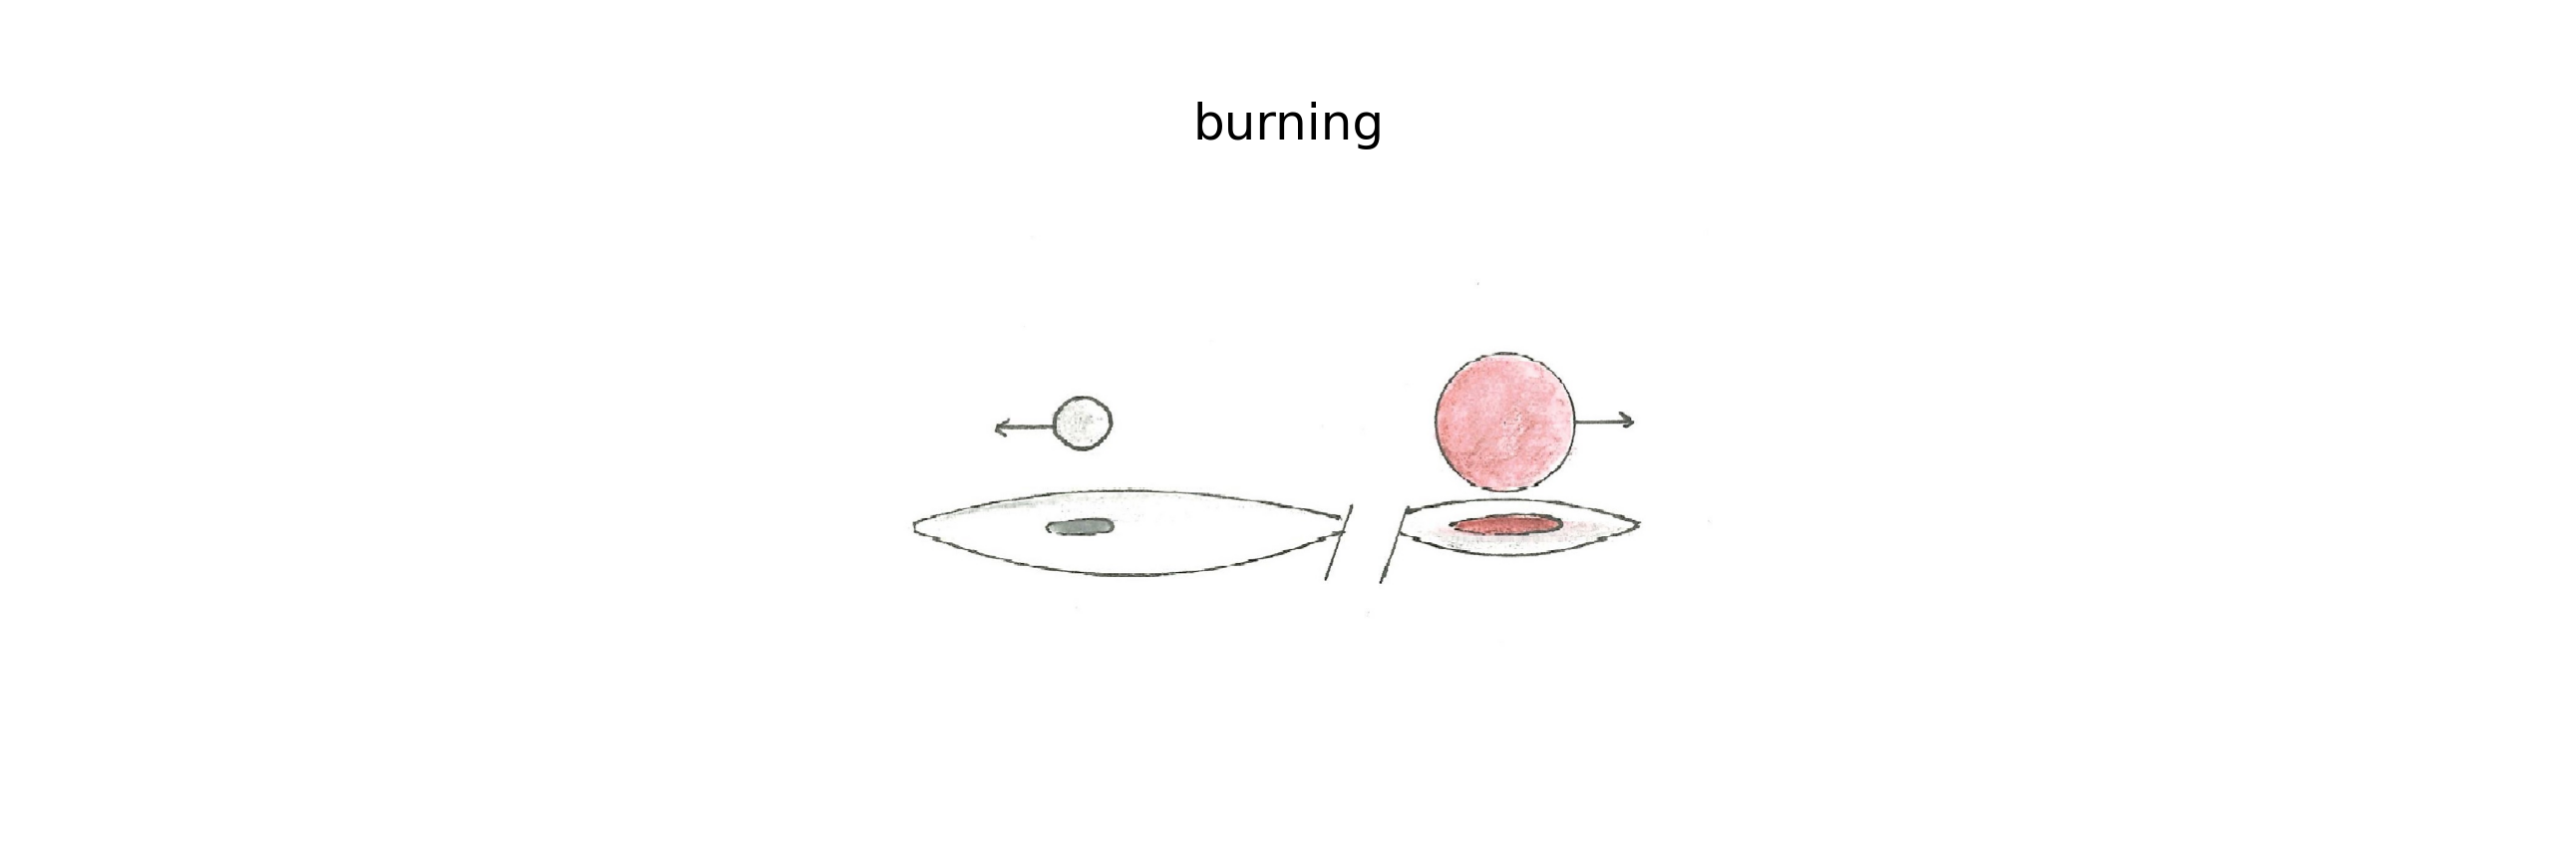

In [51]:
from matplotlib.markers import MarkerStyle
import mplcursors

def chart_object(ax, img, fontsize=12):
    ax.imshow(img)
    ax.locator_params(nbins=3)

def create_filename(dataframe, index):
    for n, index in enumerate(dataframe.index):
        # ... (previous code)

        if pd.isnull(dataframe['time'][index]):
            if n > 0:
                step_times.append(step_times[n-1])
            else:
                step_times.append("")  # Use empty string if n == 0
        else: 
            step_times.append(f"{dataframe['time'][index]/1e6:.0f} Myrs")
    return f"{dataframe['state'][index]}_{dataframe['step_names'][index]}_{dataframe['event'][index]}_{dataframe['S1_state'][index]}_{dataframe['S2_state'][index]}.jpg"

def create_plot_array(dataframe):
    plot_array = []
    for index in dataframe.index:
        filename = create_filename(dataframe, index)
        plot_array.append(filename)
    return plot_array

def create_labels(index, dataframe):
    starstate = f"{dataframe['S1_state'][index]}_{dataframe['S2_state'][index]}"
    label1 = f"S1: {dataframe['S1_mass'][index]:.2f} Solar masses"
    label2 = f"S2: {dataframe['S2_mass'][index]:.2f} Solar masses"
    label3 = f"Separation: {dataframe['separation'][index]:.2f} Solar Radii"
    return starstate, label1, label2, label3

def create_timeline_connection(axes_array):
    timeline = ConnectionPatch(
        xyA=(0, 0.5), xyB=(0, 0.5), coordsA='axes fraction', coordsB='axes fraction',
        axesA=axes_array[0], axesB=axes_array[-1], arrowstyle='->', connectionstyle='arc3,rad=0',
        color="black", lw=3, label='orlof'
    )
    return timeline

def visualize_data(plot_array, step_times, mass_arrayS1, mass_arrayS2, separation_array, axes_array, axes2_array, fig, dataframe):
    right_bar = 'bar,fraction=-0.3'
    left_bar = 'bar,fraction=0.3'

    for n, filename in enumerate(plot_array):
        print(f"Processing index {n} of {len(plot_array)}")
        image_path = os.path.join('Visualization_Data', filename)
        if os.path.exists(image_path):
            im = Image.open(image_path)
            img1 = np.array(im)

            title = filename.split(".")[0].split('_')[-1]
            ax = fig.add_subplot(gs1[n, 1])
            ax2 = fig.add_subplot(gs1[n, 0])
            ax3 = fig.add_subplot(gs1[n, 2])

            axes_array.append(ax)
            axes2_array.append(ax2)

            ax.set_title(title, fontsize=50)
            chart_object(ax, img1)

            for current_ax in [ax, ax2, ax3]:
                plt.setp(current_ax.get_xticklabels(), visible=False)
                plt.setp(current_ax.get_yticklabels(), visible=False)
                current_ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
                current_ax.spines['right'].set_visible(False)
                current_ax.spines['top'].set_visible(False)
                current_ax.spines['left'].set_visible(False)
                current_ax.spines['bottom'].set_visible(False)

            label = f"{step_times[n]}"
            label2, label3, label4 = create_labels(n, dataframe)

            ax2.text(0.1, 0.5, label, color='black', size=50, transform=ax2.transAxes)
            ax2.scatter(0.05, 0.5, color='black', transform=ax2.transAxes, marker='o', s=300, facecolor='black', linewidth=5)
            ax3.text(1, 0.6, label2, color='slategrey', fontsize=40, transform=ax3.transAxes)
            ax3.text(1, 0.5, label3, color='indianred', fontsize=40, transform=ax3.transAxes)
            ax3.text(1, 0.4, label4, color='black', fontsize=40, transform=ax3.transAxes)
            ax3.scatter(0.9, 0.6, color='slategrey', transform=ax3.transAxes, marker='*', s=300, facecolor='slategrey', linewidth=5)
            ax3.scatter(0.9, 0.5, color='indianred', transform=ax3.transAxes, marker='*', s=300, facecolor='indianred', linewidth=5)
            ax3.scatter(0.9, 0.4, color='black', transform=ax3.transAxes, marker='$S$', s=500, facecolor='black', linewidth=2)

        else:
            print(f"Image file {filename} not found in the database.")

    for i, ax in enumerate(axes_array[:-1]):
        if i % 2 == 0:
            xy1 = (1, 0.5)
            xy2 = (1, 0.5)
            bar = right_bar
        else:
            xy1 = (0, 0.5)
            xy2 = (0, 0.5)
            bar = left_bar

        con1 = ConnectionPatch(
            xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
            axesA=ax, axesB=axes_array[i + 1], arrowstyle='->', connectionstyle=bar,
            color="slategrey", lw=3, label='orlof'
        )
        fig.add_artist(con1)

    timeline = create_timeline_connection(axes2_array)
    fig.add_artist(timeline)

# Example usage
plot_array = create_plot_array(MiniVizView)
vdh(plot_array, step_array, step_times, mass_arrayS1, mass_arrayS2, separation_array, MiniVizView)
print('plot_array', plot_array)
print('step_array', step_array)
print('step_times', step_times)
print('temp_arrayS1', temp_arrayS1)
print('temp_arrayS2', temp_arrayS2)
# flowchart(plot_array)
plt.savefig("Stellar Evolution Charts/ZAMScharttest0live.png", dpi=300, bbox_inches='tight')


In [46]:
from matplotlib.markers import MarkerStyle
import mplcursors

def chartobject(ax, img, fontsize=12): 
                ax.imshow(img)
                ax.locator_params(nbins=3)
#def temperaturefilter(S1_mass,S2_mass)
            
import pandas as pd

def get_filename(dataframe, index):
    return f"{dataframe['state'][index]}_{dataframe['step_names'][index]}_{dataframe['event'][index]}_{dataframe['S1_state'][index]}_{dataframe['S2_state'][index]}.jpg"

def get_starstate(dataframe, index):
    return f"{dataframe['S1_state'][index]}_{dataframe['S2_state'][index]}"

def get_temperature(dataframe, index, log_L, log_R):
    return Temperature(dataframe[log_L][index], dataframe[log_R][index])

def format_mass(mass):
    return f"{mass:.2f} Solar masses"

def format_separation(separation):
    return f"{separation:.2f} Solar Radii"

def process_row(dataframe, index, n):
    event = dataframe['event'][index]
    state = dataframe['state'][index]
    
    starstate = get_starstate(dataframe, index)
    step_name = dataframe['step_names'][index]
    
    if pd.isnull(dataframe['time'][index]):
        step_times.append(step_times[n - 1])
    else:
        step_times.append(f"{dataframe['time'][index]/1e6:.0f} Myrs")

    if pd.isnull(dataframe['separation'][index]):
        separation_array.append(format_separation(0))
    else:
        separation_array.append(format_separation(dataframe['separation'][index]))

    if event == 'END':
        string = 'End'
        if state == 'merged':
            plot_array.append(f"{starstate}{string}_Merged.jpg")
        elif state == 'disrupted':
            plot_array.append(f"{starstate}{string}_disrupted.jpg")
    else:
        plot_array.append(f"{starstate}_{event}.jpg")

    step_array.append(step_name)
    temp_arrayS1.append(get_temperature(dataframe, index, 'S1_log_L', 'S1_log_R'))
    temp_arrayS2.append(get_temperature(dataframe, index, 'S2_log_L', 'S2_log_R'))
    mass_arrayS1.append(format_mass(dataframe['S1_mass'][index]))
    mass_arrayS2.append(format_mass(dataframe['S2_mass'][index]))

    print(f'Star1: {dataframe["S1_log_L"][index]}, {dataframe["S1_log_R"][index]}, '
          f'Star2: {dataframe["S2_log_L"][index]}, {dataframe["S2_log_R"][index]}')

# Main function
def getimage(dataframe):
    plot_array = []
    step_array = []
    step_times = []
    temp_arrayS1 = []
    temp_arrayS2 = []
    mass_arrayS1 = []
    mass_arrayS2 = []
    separation_array = []

    for n, index in enumerate(dataframe.index):
        filename = get_filename(dataframe, index)
        print(index)
        print(dataframe['event'][index])
        print(type(dataframe['event'][index]))
        print('timecolumn:', dataframe['time'][index])
        print(type(dataframe['time'][index]))

        if pd.isnull(dataframe['event'][index]):
            process_row(dataframe, index, n)
        elif dataframe['event'][index] == 'oCE1':
            process_row(dataframe, index, n)
        elif dataframe['event'][index] == 'CC1':
            process_row(dataframe, index, n)
        elif dataframe['event'][index] == 'oRLOF2':
            process_row(dataframe, index, n)
        else:
            print('!')
            starstate = get_starstate(dataframe, index)
            newname = f"{dataframe['state'][index]}_{dataframe['step_names'][index]}.jpg"
            step_array.append(dataframe['step_names'][index])
            temp_arrayS1.append(get_temperature(dataframe, index, 'S1_log_L', 'S1_log_R'))
            temp_arrayS2.append(get_temperature(dataframe, index, 'S2_log_L', 'S2_log_R'))
            mass_arrayS1.append(format_mass(dataframe['S1_mass'][index]))
            mass_arrayS2.append(format_mass(dataframe['S2_mass'][index]))
            print(f'Star1: {dataframe["S1_log_L"][index]}, {dataframe["S1_log_R"][index]}, '
                  f'Star2: {dataframe["S2_log_L"][index]}, {dataframe["S2_log_R"][index]}')
            print(newname)
    plot_array.append(f"{starstate}{newname}")


    print(plot_array, temp_arrayS1, temp_arrayS2)
    return plot_array, step_array, step_times, temp_arrayS1, temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array

def vdh(plot_array, step_array, step_times, mass_array_S1, mass_array_S2, separation_array, dataframe):
    gs1 = gridspec.GridSpec(len(plot_array), 3)
    print(len(plot_array))
    print(plot_array)
    fig = plt.figure(tight_layout=True, figsize=(12*3,12*len(plot_array))) 
    axes_array=[]
    axes2_array=[]                              
    for n,filename in enumerate(plot_array):
        image_path = os.path.join('Visualization_Data', filename)
                              
        if os.path.exists(image_path):

            
            # Open and display the image with istich 
            im = Image.open(image_path)  
            img1 = np.array(im)
            
                        
                                  
            #imgpath = np.asarray(Image.open(image_path))
            #img=cv2.imread(image_path)
            #print(repr(imgpath))

            #img = imgpath[:, :, 0]
            #RGB_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            title=filename.split(".")[0].split('_')[-1] #different titles will be placed
            ax = fig.add_subplot(gs1[n, 1])
            ax2 = fig.add_subplot(gs1[n,0])
            ax3= fig.add_subplot(gs1[n,2])
            axes_array.append(ax)  # Add the current ax to the list
            axes2_array.append(ax2)
            ax.set_title(title, fontsize=50) 
            chartobject(ax, img1)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['left'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            plt.setp(ax3.get_xticklabels(), visible=False)
            plt.setp(ax3.get_yticklabels(), visible=False)
            ax3.tick_params(labelbottom=False, left=False, labelleft=False,  bottom=False)
            ax3.spines['right'].set_visible(False)
            ax3.spines['top'].set_visible(False)
            ax3.spines['left'].set_visible(False)
            ax3.spines['bottom'].set_visible(False)
            #ax2.set_xlimit(0,5)
            label = f"{step_times[n]}" # Customize the annotation text as needed
            label2=f"S1: {mass_arrayS1[n]}"
            label3=f"S2: {mass_arrayS2[n]}"
            label4=f"separation: {separation_array[n]}"
            ax2.text(0.1,0.5, label, color='black',size=50,transform=ax2.transAxes)
            ax2.scatter(0.05,0.5, color='black',transform=ax2.transAxes,marker='o', s=300, facecolor='black',linewidth=5)
            ax3.text(1,0.6, label2, color='slategrey', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.5, label3, color='indianred', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.4, label4, color='black', fontsize=40,transform=ax3.transAxes)                    
            ax3.scatter(0.9,0.6, color='slategrey',transform=ax3.transAxes,marker='*', s=300, facecolor='slategrey',linewidth=5)
            ax3.scatter(0.9,0.5, color='indianred',transform=ax3.transAxes,marker='*', s=300, facecolor='indianred',linewidth=5) 
            ax3.scatter(0.9,0.4, color='black',transform=ax3.transAxes,marker='$S$', s=500, facecolor='black',linewidth=2)
                                          #ha='right', va='center')

            #ax2.scatter()
            
            #ax2 = fig.add_subplot(gs1[2])
            #plt.setp(ax2.get_xticklabels(), visible=False)
            #plt.setp(ax2.get_yticklabels(), visible=False)
            #ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            #ax2.spines['right'].set_visible(False)
            #ax2.spines['top'].set_visible(False)
            #ax2.spines['left'].set_visible(False)
            #ax2.spines['bottom'].set_visible(False)



        else:
            print(f"Image file {filename} not found in the database.")
    rightbar='bar,fraction=-0.3'
    leftbar='bar,fraction=0.3'
    for i,ax in enumerate(axes_array[:-1]):
        if i%2==0:
            xy1=(1,0.5)#for right side
            xy2=(1,0.5)
            bar=rightbar
            rightx=1
            righty=-1
            x=rightx
            y=righty

        else:
            xy1=(0,0.5)#left side
            xy2=(0,0.5)
            bar=leftbar
            leftx=-1
            lefty=-1
            x=leftx
            y=lefty
    
            
        # Adding annotation to the line
        #label = f"{step_array[i]}"  # Customize the annotation text as needed
        #print(label)
        #ax.text(x, y, label, color='slategrey', fontsize=24,
                                          #ha='right', va='center', rotation=90, transform=ax.transAxes)                          
        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                        axesA=ax, axesB=axes_array[i+1], arrowstyle='->', connectionstyle=bar,
                                        color="slategrey", lw=3, label='orlof')  # <-- Adding "orlof" label here
            # Add the connection patch to the figure
        fig.add_artist(con1)
    
    
        
    timeline = ConnectionPatch(xyA=(0,0.5), xyB=(0,0.5), coordsA='axes fraction', coordsB="axes fraction",
                                    axesA=axes2_array[0], axesB=axes2_array[-1], arrowstyle='->', connectionstyle='arc3,rad=0',
                                    color="black", lw=3, label='orlof')  # <-- Adding "orlof" label here
    if axes2_array:
        timeline = ConnectionPatch(xyA=(0, 0.5), xyB=(0, 0.5), coordsA='axes fraction', coordsB="axes fraction",
                                   axesA=axes2_array[0], axesB=axes2_array[-1], arrowstyle='->', connectionstyle='arc3,rad=0',
                                   color="black", lw=3, label='orlof')
        # Add the connection patch to the figure
    fig.add_artist(timeline)
                                



# Example usage
plot_array,step_array,step_times,temp_arrayS1,temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array=getimage(MiniVizView)
vdh(plot_array,step_array,step_times, mass_arrayS1, mass_arrayS2, separation_array, MiniVizView)
print('plot_array',plot_array)
print('step_array',step_array)
print('step_times', step_times)
print('temp_arrayS1',temp_arrayS1)
print('temp_arrayS2',temp_arrayS2)
#flowchart(plot_array)
plt.savefig("Stellar Evolution Charts/ZAMScharttest0live.png",dpi=300, bbox_inches='tight')


405
ZAMS
<class 'str'>
timecolumn: 6402112752.762615
<class 'float'>
!
nan
nan
nan
nan
Star1: nan, nan, Star2: nan, nan
detached_initial_cond.jpg
406
CC1
<class 'str'>
timecolumn: 6457241773.380686
<class 'numpy.float64'>
1.061551569759388e+38
31033504988462.92
1.5688217705591328e+36
176401044850.81293
Star1: 4.440480367361789, 2.649408825116793, Star2: 2.610112877902946, 0.40407914983950366
407
nan
<class 'float'>
timecolumn: 6457241773.380686
<class 'numpy.float64'>
nan
nan
1.5688217705591328e+36
176401044850.81293
Star1: nan, nan, Star2: 2.610112877902946, 0.40407914983950366
408
END
<class 'str'>
timecolumn: 6457241773.380686
<class 'numpy.float64'>
!
nan
nan
1.5688217705591328e+36
176401044850.81293
Star1: nan, nan, Star2: 2.610112877902946, 0.40407914983950366
disrupted_step_end.jpg
['NS_H-rich_Core_H_burningdisrupted_step_end.jpg'] [nan, nan] [nan, 16309.288702475878]
1
['NS_H-rich_Core_H_burningdisrupted_step_end.jpg']
Image file NS_H-rich_Core_H_burningdisrupted_step_end.jpg n

IndexError: list index out of range

<Figure size 2592x864 with 0 Axes>

detached_initial_cond_ZAMS_H-rich_Core_H_burning_H-rich_Core_H_burning.jpg
385
ZAMS
<class 'str'>
timecolumn: 2111839918.645049
<class 'float'>
Star1: nan nan Star2: nan nan
contact_step_HMS_HMS_oCE1_H-rich_Core_H_burning_H-rich_Core_H_burning.jpg
386
oCE1
<class 'str'>
timecolumn: 2117200513.8302891
<class 'numpy.float64'>
Star1: 4.873162679240444 1.018292393833572 Star2: 2.4211642542096774 0.47450560019749044
merged_step_CE_nan_H-rich_Core_H_burning_H-rich_Core_H_burning.jpg
387
nan
<class 'float'>
timecolumn: nan
<class 'float'>
!
Star1: nan nan Star2: nan nan
merged_step_end_END_H-rich_Core_H_burning_H-rich_Core_H_burning.jpg
388
END
<class 'str'>
timecolumn: nan
<class 'float'>
['H-rich_Core_H_burning_H-rich_Core_H_burning_ZAMS.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burning_oCE1.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burning_nan.jpg', 'H-rich_Core_H_burning_H-rich_Core_H_burningEnd_Merged.jpg'] ['24.24 Solar masses', '23.35 Solar masses', '24.89 Solar masses'] ['1.54 Solar

/projects/b1094/software/miniconda3/envs/posydon/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


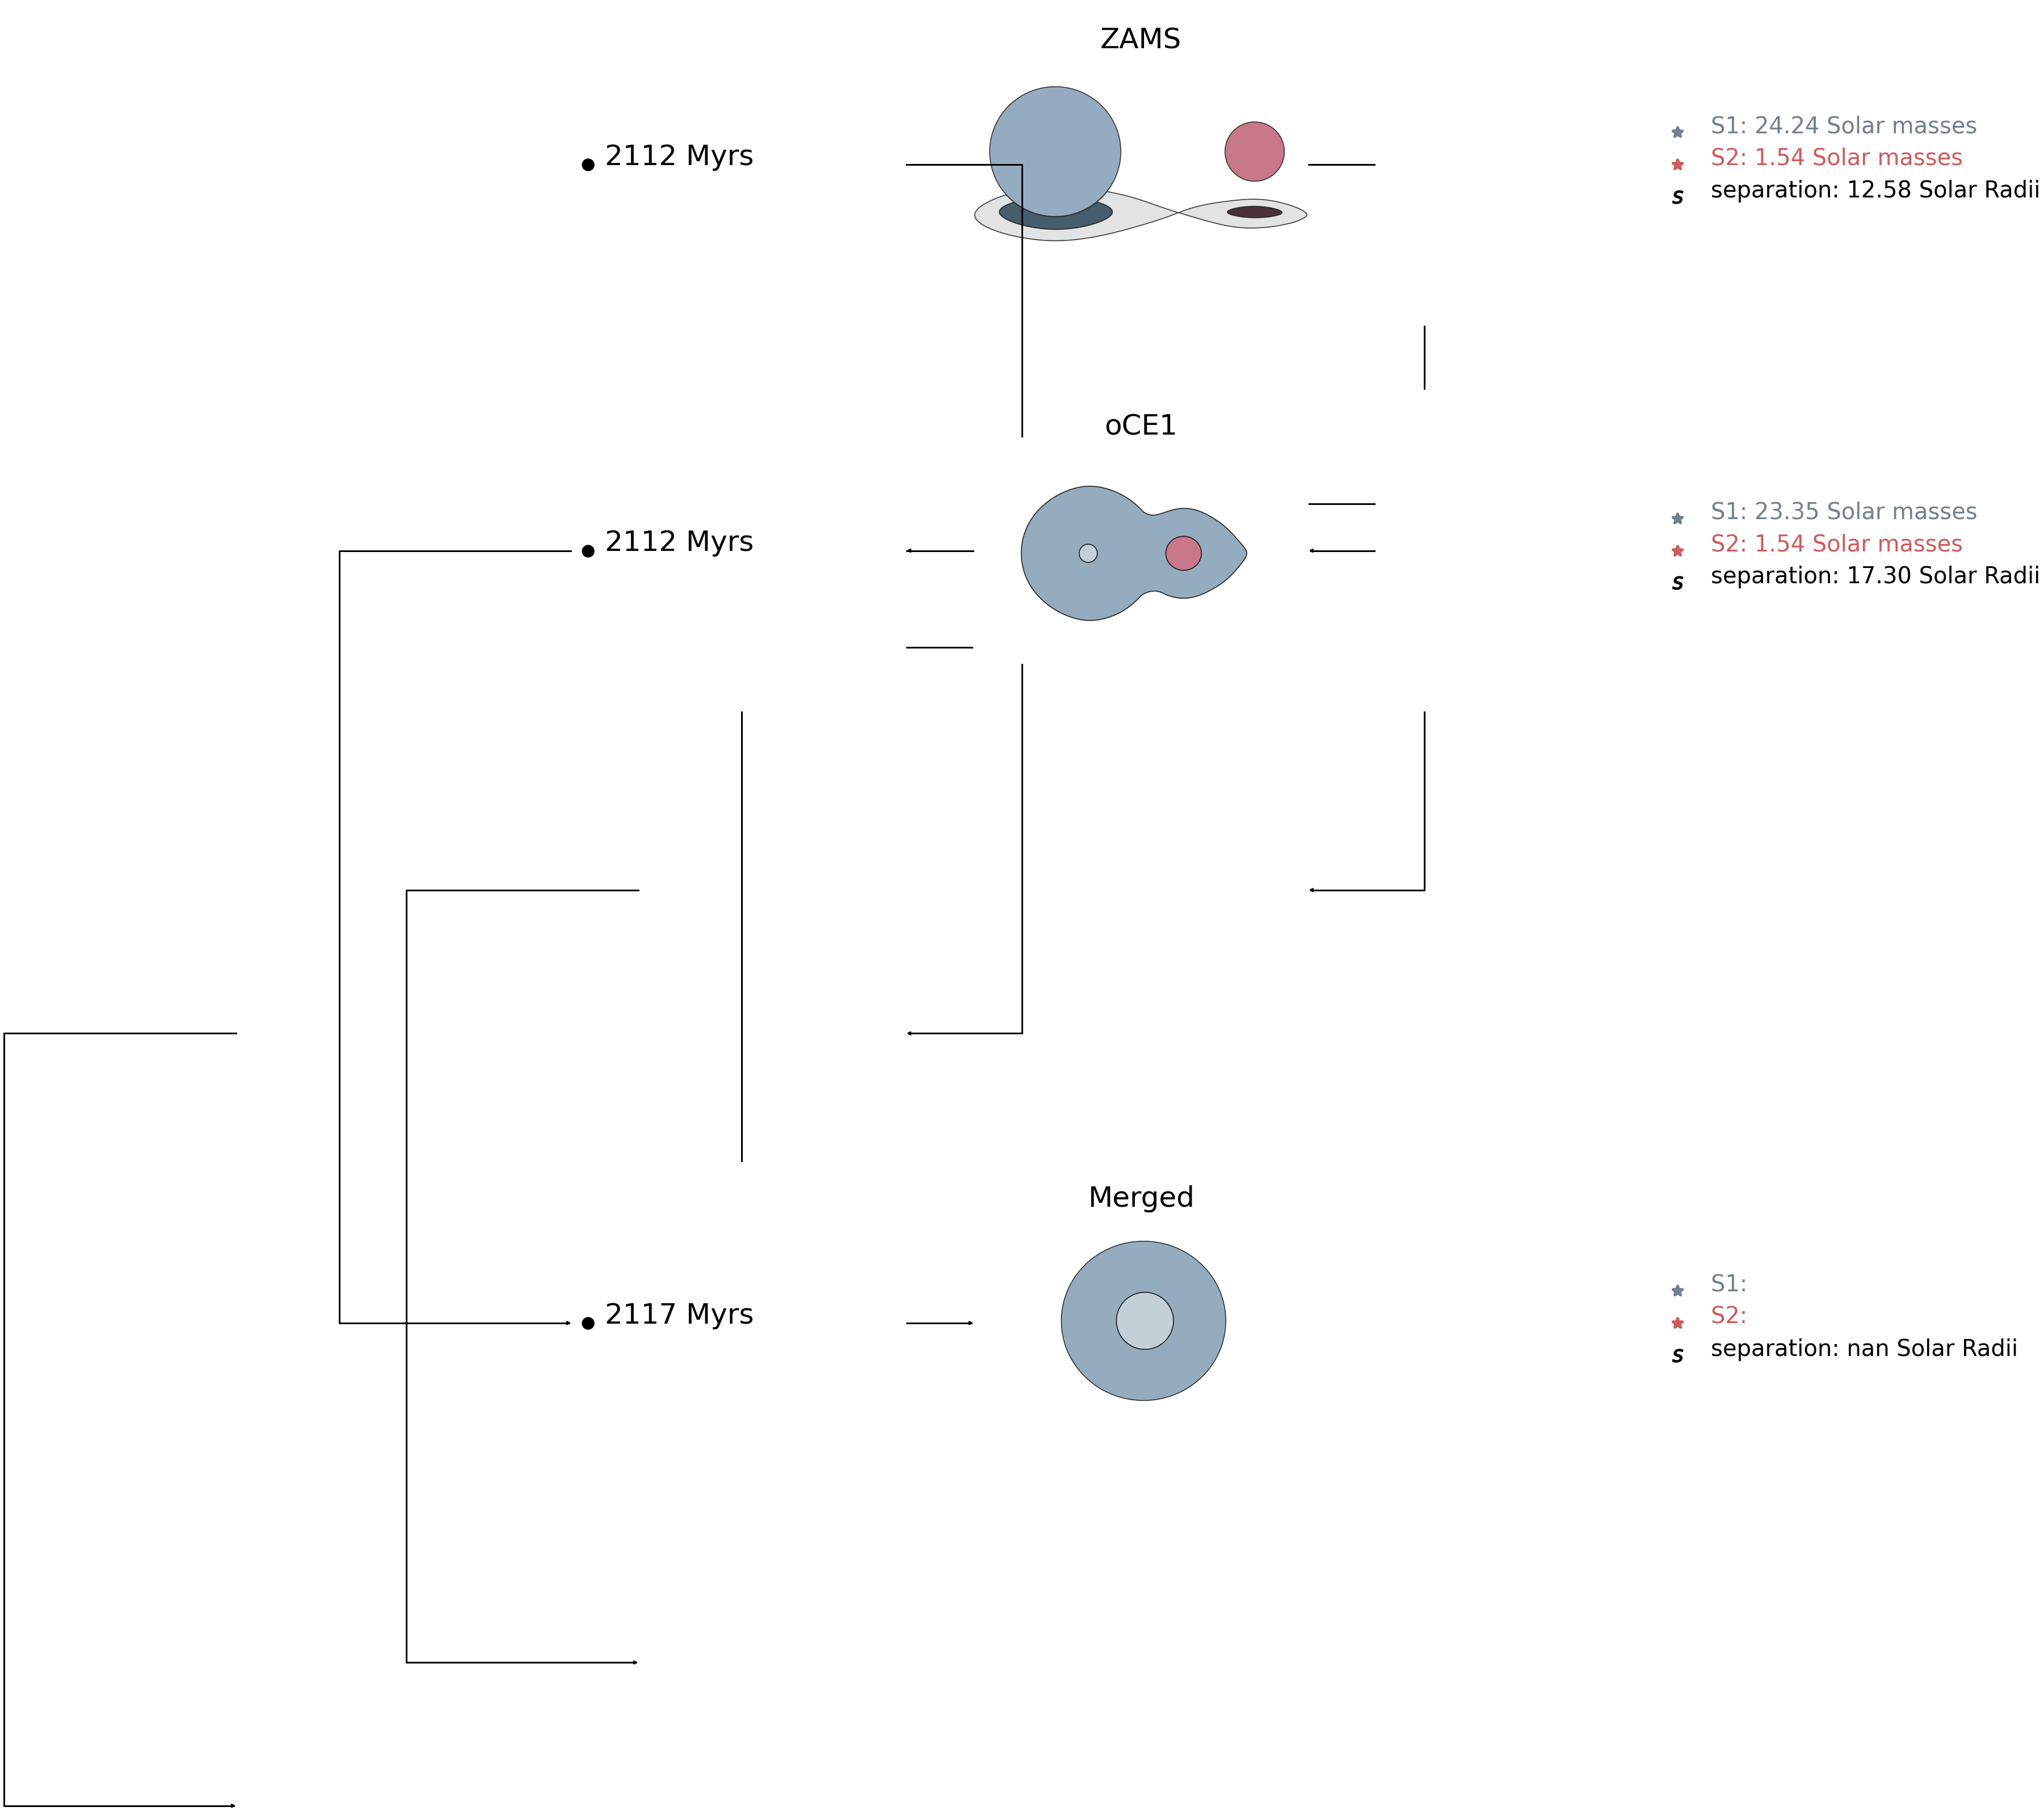

In [40]:
#first go at simplified
import pandas as pd
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt, gridspec
from matplotlib.patches import ConnectionPatch

# Assuming that 'DF' is a global DataFrame variable

def getstar(indx):
    data = DF.loc[DF['binary_index'] == indx]
    return pd.DataFrame(data)

def chartobject(ax, img, fontsize=12):
    ax.imshow(img)
    ax.locator_params(nbins=3)

def temperaturefilter(S1_mass, S2_mass):
    # Add your implementation here
    pass

def getimage(dataframe):
    plot_array = []
    step_array = []
    step_times = []
    temp_arrayS1 = []
    temp_arrayS2 = []
    mass_arrayS1 = []
    mass_arrayS2 = []
    separation_array = []

    def add_to_arrays(index):
        if index is None:
            return
        
        starstate = f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
        plot_array.append(starstate + '_' + f"{dataframe['event'][index]}.jpg")
        step_array.append(f"{dataframe['step_names'][index]}")
        step_times.append(f"{dataframe['time'][index] / 1e6:.0f} Myrs")
        
        # Handle null values for masses
        if pd.notnull(dataframe['S1_mass'][index]):
            temp_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
        else:
            temp_arrayS1.append(temp_arrayS1[-1])  # Use the previous value
    
        if pd.notnull(dataframe['S2_mass'][index]):
            temp_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
        else:
            temp_arrayS2.append(temp_arrayS2[-1])  # Use the previous value
        
        if pd.notnull(dataframe['S1_mass'][index]):
            mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
        else:
            mass_arrayS1.append(mass_arrayS1[-1])  # Use the previous value

        if pd.notnull(dataframe['S2_mass'][index]):
            mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
        else:
            mass_arrayS2.append(mass_arrayS2[-1])  # Use the previous value
        
        separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")
        
        print('Star1:', dataframe['S1_log_L'][index], dataframe['S1_log_R'][index],
              'Star2:', dataframe['S2_log_L'][index], dataframe['S2_log_R'][index])

    for n, index in enumerate(dataframe.index):
        filename = f"{dataframe['state'][index]}_{dataframe['step_names'][index]}_{dataframe['event'][index]}_{dataframe['S1_state'][index]}_{dataframe['S2_state'][index]}.jpg"
        print(filename)
        print(index)
        print(dataframe['event'][index])
        print(type(dataframe['event'][index]))
        print('timecolumn:', dataframe['time'][index])
        print(type(dataframe['time'][index]))

        if pd.isnull(dataframe['time'][index]):
            step_times.append(step_times[n - 1])
        else:
            step_times.append(f"{dataframe['time'][index] / 1e6:.0f} Myrs")

        if pd.isnull(dataframe['separation'][index]):
            separation_array.append(f"{0}")

        if pd.isnull(dataframe['event'][index]):
            print('!')
            add_to_arrays(index)

        if dataframe['event'][index] in ['ZAMS', 'oCE1', 'CC1']:
            add_to_arrays(index)

        if dataframe['event'][index] == 'END':
            string = 'End'
            step_times.append(f"{dataframe['time'][index]}")
            starstate = f"{dataframe['S1_state'][index]}" + "_" + f"{dataframe['S2_state'][index]}"
            if dataframe['state'][index] == 'merged':
                plot_array.append(starstate + string + '_' + "Merged.jpg")
            elif dataframe['state'][index] == 'disrupted':
                plot_array.append(starstate + string + '_' + 'disrupted.jpg')

    print(plot_array, temp_arrayS1, temp_arrayS2)
    return plot_array, step_array, step_times, temp_arrayS1, temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array

def vdh(plot_array, step_array, step_times, mass_array_S1, mass_array_S2, separation_array, dataframe):
    gs1 = gridspec.GridSpec(len(plot_array), 3)
    print(len(plot_array))
    print(plot_array)
    fig = plt.figure(tight_layout=True, figsize=(12 * 3, 12 * len(plot_array)))
    axes_array = []
    axes2_array = []

    for n, filename in enumerate(plot_array):
        image_path = os.path.join('Visualization_Data', filename)

        if os.path.exists(image_path):
            im = Image.open(image_path)
            img1 = np.array(im)

            title = filename.split(".")[0].split('_')[-1]
            ax = fig.add_subplot(gs1[n, 1])
            ax2 = fig.add_subplot(gs1[n, 0])
            ax3 = fig.add_subplot(gs1[n, 2])
            axes_array.append(ax)
            axes2_array.append(ax2)
            ax.set_title(title, fontsize=50)
            chartobject(ax, img1)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['left'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            plt.setp(ax3.get_xticklabels(), visible=False)
            plt.setp(ax3.get_yticklabels(), visible=False)
            ax3.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax3.spines['right'].set_visible(False)
            ax3.spines['top'].set_visible(False)
            ax3.spines['left'].set_visible(False)
            ax3.spines['bottom'].set_visible(False)

            label = f"{step_times[n]}"
            label2 = f"S1: {mass_array_S1[n] if n < len(mass_array_S1) else ''}"
            label3 = f"S2: {mass_array_S2[n] if n < len(mass_array_S2) else ''}"
            label4 = f"separation: {separation_array[n] if n < len(separation_array) else ''}"
            ax2.text(0.1, 0.5, label, color='black', size=50, transform=ax2.transAxes)
            ax2.scatter(0.05, 0.5, color='black', transform=ax2.transAxes, marker='o', s=300, facecolor='black',
                        linewidth=5)
            ax3.text(1, 0.6, label2, color='slategrey', fontsize=40, transform=ax3.transAxes)
            ax3.text(1, 0.5, label3, color='indianred', fontsize=40, transform=ax3.transAxes)
            ax3.text(1, 0.4, label4, color='black', fontsize=40, transform=ax3.transAxes)
            ax3.scatter(0.9, 0.6, color='slategrey', transform=ax3.transAxes, marker='*', s=300, facecolor='slategrey',
                        linewidth=5)
            ax3.scatter(0.9, 0.5, color='indianred', transform=ax3.transAxes, marker='*', s=300, facecolor='indianred',
                        linewidth=5)
            ax3.scatter(0.9, 0.4, color='black', transform=ax3.transAxes, marker='$S$', s=500, facecolor='black',
                        linewidth=2)

        else:
            print(f"Image file {filename} not found in the database.")

    rightbar = 'bar,fraction=-0.3'
    leftbar = 'bar,fraction=0.3'
    for i, ax in enumerate(axes_array[:-1]):
        if i % 2 == 0:
            xy1 = (1, 0.5)
            xy2 = (1, 0.5)
            bar = rightbar
            rightx = 1
            righty = -1
            x = rightx
            y = righty
        else:
            xy1 = (0, 0.5)
            xy2 = (0, 0.5)
            bar = leftbar
            leftx = -1
            lefty = -1
            x = leftx
            y = lefty

        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                axesA=ax, axesB=axes_array[min(i + 1, len(axes_array) - 1)], arrowstyle='->', connectionstyle=bar,
                                color="slategrey", lw=3, label='_nolegend_')
        con2 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                axesA=ax, axesB=axes_array[min(i + 1, len(axes_array) - 1)], arrowstyle='->', connectionstyle=bar,
                                color="indianred", lw=3, label='_nolegend_')
        con3 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                axesA=ax, axesB=axes_array[min(i + 1, len(axes_array) - 1)], arrowstyle='->', connectionstyle=bar,
                                color="black", lw=3, label='_nolegend_')

        axes_array[i].add_artist(con1)
        axes_array[i].add_artist(con2)
        axes_array[i].add_artist(con3)

        con4 = ConnectionPatch(xyA=(x, y), xyB=(x, y), coordsA='axes fraction', coordsB="axes fraction",
                                axesA=axes_array[i], axesB=axes_array[min(i + 1, len(axes_array) - 1)], arrowstyle='->',
                                connectionstyle=bar, color="slategrey", lw=3, label='_nolegend_')
        con5 = ConnectionPatch(xyA=(x, y), xyB=(x, y), coordsA='axes fraction', coordsB="axes fraction",
                                axesA=axes_array[i], axesB=axes_array[min(i + 1, len(axes_array) - 1)], arrowstyle='->',
                                connectionstyle=bar, color="indianred", lw=3, label='_nolegend_')
        con6 = ConnectionPatch(xyA=(x, y), xyB=(x, y), coordsA='axes fraction', coordsB="axes fraction",
                                axesA=axes_array[i], axesB=axes_array[min(i + 1, len(axes_array) - 1)], arrowstyle='->',
                                connectionstyle=bar, color="black", lw=3, label='_nolegend_')

        axes_array[i].add_artist(con4)
        axes_array[i].add_artist(con5)
        axes_array[i].add_artist(con6)

    for i, ax in enumerate(axes2_array[:-1]):
        if i % 2 == 0:
            xy1 = (1, 0.5)
            xy2 = (1, 0.5)
            bar = rightbar
            rightx = 1
            righty = -1
            x = rightx
            y = righty
        else:
            xy1 = (0, 0.5)
            xy2 = (0, 0.5)
            bar = leftbar
            leftx = -1
            lefty = -1
            x = leftx
            y = lefty

        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                axesA=ax, axesB=axes2_array[min(i + 1, len(axes2_array) - 1)], arrowstyle='->', connectionstyle=bar,
                                color="slategrey", lw=3, label='_nolegend_')
        con2 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                axesA=ax, axesB=axes2_array[min(i + 1, len(axes2_array) - 1)], arrowstyle='->', connectionstyle=bar,
                                color="indianred", lw=3, label='_nolegend_')
        con3 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                axesA=ax, axesB=axes2_array[min(i + 1, len(axes2_array) - 1)], arrowstyle='->', connectionstyle=bar,
                                color="black", lw=3, label='_nolegend_')

        axes2_array[i].add_artist(con1)
        axes2_array[i].add_artist(con2)
        axes2_array[i].add_artist(con3)

        con4 = ConnectionPatch(xyA=(x, y), xyB=(x, y), coordsA='axes fraction', coordsB="axes fraction",
                                axesA=axes2_array[i], axesB=axes2_array[min(i + 1, len(axes2_array) - 1)], arrowstyle='->',
                                connectionstyle=bar, color="slategrey", lw=3, label='_nolegend_')
        con5 = ConnectionPatch(xyA=(x, y), xyB=(x, y), coordsA='axes fraction', coordsB="axes fraction",
                                axesA=axes2_array[i], axesB=axes2_array[min(i + 1, len(axes2_array) - 1)], arrowstyle='->',
                                connectionstyle=bar, color="indianred", lw=3, label='_nolegend_')
        con6 = ConnectionPatch(xyA=(x, y), xyB=(x, y), coordsA='axes fraction', coordsB="axes fraction",
                                axesA=axes2_array[i], axesB=axes2_array[min(i + 1, len(axes2_array) - 1)], arrowstyle='->',
                                connectionstyle=bar, color="black", lw=3, label='_nolegend_')

        axes2_array[i].add_artist(con4)
        axes2_array[i].add_artist(con5)
        axes2_array[i].add_artist(con6)

    plt.show()


# Example usage
plot_array, step_array, step_times, temp_arrayS1, temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array = getimage(
    MiniVizView)
vdh(plot_array, step_array, step_times, mass_arrayS1, mass_arrayS2, separation_array, MiniVizView)

In [ ]:
min_length = min(len(plot_array), len(step_times), len(mass_array_S1), len(mass_array_S2), len(separation_array))
    plot_array = plot_array[:min_length]
    step_times = step_times[:min_length]
    mass_array_S1 = mass_array_S1[:min_length]
    mass_array_S2 = mass_array_S2[:min_length]
    separation_array = separation_array[:min_length]

In [41]:
#secondgoatv2
import pandas as pd
from matplotlib.markers import MarkerStyle
import mplcursors
from PIL import Image
from matplotlib.gridspec import GridSpec
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import os

def read_stellar_temps():
    return pd.read_csv('Visualization_Data/Stellar_Temperature/Teff_RGB_Hex.csv')

import pandas as pd
#df = DF.rename_axis('binary_index').reset_index() #always comment out after you run so you don't create another column
def getstar(indx): 
    data = DF.loc[DF['binary_index']==indx]
    return pd.DataFrame(data)
minidataframe = getstar(95) #99 is interesting 
MiniVizView=minidataframe[state_info_columns]
MiniVizView

def chart_object(ax, img, fontsize=12):
    ax.imshow(img)
    ax.locator_params(nbins=3)

def get_image(dataframe):
    plot_array = []
    step_array = []
    step_times = []
    temp_arrayS1 = []
    temp_arrayS2 = []
    mass_arrayS1 = []
    mass_arrayS2 = []
    separation_array = []

    for index, row in dataframe.iterrows():
        filename = f"{row['state']}_{row['step_names']}_{row['event']}_{row['S1_state']}_{row['S2_state']}.jpg"
        print(index)
        print(row['event'])
        print(type(row['event']))
        print('timecolumn:', row['time'])
        print(type(row['time']))

        if pd.isnull(row['time']):
            step_times.append(step_times[-1])
        else:
            step_times.append(f"{row['time']/1e6:.0f} Myrs")

        star_state = f"{row['S1_state']}_{row['S2_state']}"
        plot_array.append(f"{star_state}_{row['event']}.jpg")
        step_array.append(row['step_names'])
        temp_arrayS1.append(Temperature(row['S1_log_L'], row['S1_log_R']))
        temp_arrayS2.append(Temperature(row['S2_log_L'], row['S2_log_R']))
        mass_arrayS1.append(f"{row['S1_mass']:.2f} Solar masses")
        mass_arrayS2.append(f"{row['S2_mass']:.2f} Solar masses")
        separation_array.append(f"{row['separation']:.2f} Solar Radii")

        print(f'Star1: {row["S1_log_L"]}, {row["S1_log_R"]}, Star2: {row["S2_log_L"]}, {row["S2_log_R"]}')

        if row['event'] == 'END':
            string = 'End'
            step_times.append(f"{row['time']}")
            if row['state'] == 'merged':
                plot_array.append(f"{star_state}{string}_Merged.jpg")
                temp_arrayS1.append(Temperature(row['S1_log_L'], row['S1_log_R']))
                temp_arrayS2.append(Temperature(row['S2_log_L'], row['S2_log_R']))
                mass_arrayS1.append(f"{row['S1_mass']:.2f} Solar masses")
                mass_arrayS2.append(f"{row['S2_mass']:.2f} Solar masses")
            elif row['state'] == 'disrupted':
                plot_array.append(f"{star_state}{string}_disrupted.jpg")
                temp_arrayS1.append(Temperature(row['S1_log_L'], row['S1_log_R']))
                temp_arrayS2.append(Temperature(row['S2_log_L'], row['S2_log_R']))
                mass_arrayS1.append(f"{row['S1_mass']:.2f} Solar masses")
                mass_arrayS2.append(f"{row['S2_mass']:.2f} Solar masses")

        if pd.isnull(row['event']):
            print('!')
            new_name = f"{row['state']}_{row['step_names']}.jpg"
            step_array.append(row['step_names'])
            temp_arrayS1.append(Temperature(row['S1_log_L'], row['S1_log_R']))
            temp_arrayS2.append(Temperature(row['S2_log_L'], row['S2_log_R']))
            mass_arrayS1.append(f"{row['S1_mass']:.2f} Solar masses")
            mass_arrayS2.append(f"{row['S2_mass']:.2f} Solar masses")
            separation_array.append(f"{row['separation']:.2f} Solar Radii")
            print('Star1:', row['S1_log_L'], row['S1_log_R'], 'Star2:', row['S2_log_L'], row['S2_log_R'])
            print(new_name)
            plot_array.append(f"{star_state}{new_name}")

        if pd.isnull(row['separation']):
            separation_array.append(f"{0}")

    print(plot_array, temp_arrayS1, temp_arrayS2)
    return plot_array, step_array, step_times, temp_arrayS1, temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array

def vdh(plot_array,step_array,step_times, mass_array_S1, mass_array_S2, separation_array, dataframe): 
    gs1 = gridspec.GridSpec(len(plot_array), 3)
    print(len(plot_array))
    print(plot_array)
    fig = plt.figure(tight_layout=True, figsize=(12*3,12*len(plot_array))) 
    axes_array=[]
    axes2_array=[]                              
    for n,filename in enumerate(plot_array):
        image_path = os.path.join('Visualization_Data', filename)
                              
        if os.path.exists(image_path):

            
            # Open and display the image with istich 
            im = Image.open(image_path)  
            img1 = np.array(im)
            
                        
                                  
            #imgpath = np.asarray(Image.open(image_path))
            #img=cv2.imread(image_path)
            #print(repr(imgpath))

            #img = imgpath[:, :, 0]
            #RGB_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            title=filename.split(".")[0].split('_')[-1] #different titles will be placed
            ax = fig.add_subplot(gs1[n, 1])
            ax2 = fig.add_subplot(gs1[n,0])
            ax3= fig.add_subplot(gs1[n,2])
            axes_array.append(ax)  # Add the current ax to the list
            axes2_array.append(ax2)
            ax.set_title(title, fontsize=50) 
            chartobject(ax, img1)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['left'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            plt.setp(ax3.get_xticklabels(), visible=False)
            plt.setp(ax3.get_yticklabels(), visible=False)
            ax3.tick_params(labelbottom=False, left=False, labelleft=False,  bottom=False)
            ax3.spines['right'].set_visible(False)
            ax3.spines['top'].set_visible(False)
            ax3.spines['left'].set_visible(False)
            ax3.spines['bottom'].set_visible(False)
            #ax2.set_xlimit(0,5)
            label = f"{step_times[n]}" # Customize the annotation text as needed
            label2=f"S1: {mass_arrayS1[n]}"
            label3=f"S2: {mass_arrayS2[n]}"
            label4=f"separation: {separation_array[n]}"
            ax2.text(0.1,0.5, label, color='black',size=50,transform=ax2.transAxes)
            ax2.scatter(0.05,0.5, color='black',transform=ax2.transAxes,marker='o', s=300, facecolor='black',linewidth=5)
            ax3.text(1,0.6, label2, color='slategrey', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.5, label3, color='indianred', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.4, label4, color='black', fontsize=40,transform=ax3.transAxes)                    
            ax3.scatter(0.9,0.6, color='slategrey',transform=ax3.transAxes,marker='*', s=300, facecolor='slategrey',linewidth=5)
            ax3.scatter(0.9,0.5, color='indianred',transform=ax3.transAxes,marker='*', s=300, facecolor='indianred',linewidth=5) 
            ax3.scatter(0.9,0.4, color='black',transform=ax3.transAxes,marker='$S$', s=500, facecolor='black',linewidth=2)
                                          #ha='right', va='center')

            #ax2.scatter()
            
            #ax2 = fig.add_subplot(gs1[2])
            #plt.setp(ax2.get_xticklabels(), visible=False)
            #plt.setp(ax2.get_yticklabels(), visible=False)
            #ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            #ax2.spines['right'].set_visible(False)
            #ax2.spines['top'].set_visible(False)
            #ax2.spines['left'].set_visible(False)
            #ax2.spines['bottom'].set_visible(False)



        else:
            print(f"Image file {filename} not found in the database.")
    rightbar='bar,fraction=-0.3'
    leftbar='bar,fraction=0.3'
    for i,ax in enumerate(axes_array[:-1]):
        if i%2==0:
            xy1=(1,0.5)#for right side
            xy2=(1,0.5)
            bar=rightbar
            rightx=1
            righty=-1
            x=rightx
            y=righty

        else:
            xy1=(0,0.5)#left side
            xy2=(0,0.5)
            bar=leftbar
            leftx=-1
            lefty=-1
            x=leftx
            y=lefty
    
            
        # Adding annotation to the line
        #label = f"{step_array[i]}"  # Customize the annotation text as needed
        #print(label)
        #ax.text(x, y, label, color='slategrey', fontsize=24,
                                          #ha='right', va='center', rotation=90, transform=ax.transAxes)                          
        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                        axesA=ax, axesB=axes_array[i+1], arrowstyle='->', connectionstyle=bar,
                                        color="slategrey", lw=3, label='orlof')  # <-- Adding "orlof" label here
            # Add the connection patch to the figure
        fig.add_artist(con1)
    
    
        
    timeline = ConnectionPatch(xyA=(0,0.5), xyB=(0,0.5), coordsA='axes fraction', coordsB="axes fraction",
                                    axesA=axes2_array[0], axesB=axes2_array[-1], arrowstyle='->', connectionstyle='arc3,rad=0',
                                    color="black", lw=3, label='orlof')  # <-- Adding "orlof" label here
        # Add the connection patch to the figure
    fig.add_artist(timeline)
                                




# Example usage
stellar_temps = read_stellar_temps()
minidataframe = get_star(stellar_temps, 95)
MiniVizView = minidataframe[state_info_columns]
plot_array, step_array, step_times, temp_arrayS1, temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array = get_image(MiniVizView)
visualize_data(plot_array, step_array, step_times, mass_arrayS1, mass_arrayS2, separation_array)

plt.savefig("Stellar Evolution Charts/ZAMScharttest0live.png", dpi=300, bbox_inches='tight')


KeyError: 'binary_index'

In [47]:
import pandas as pd

def get_image(dataframe):
    def generate_filename(index):
        state = dataframe['state'][index]
        step_name = dataframe['step_names'][index]
        event = dataframe['event'][index]
        S1_state = dataframe['S1_state'][index]
        S2_state = dataframe['S2_state'][index]
        return f"{state}_{step_name}_{event}_{S1_state}_{S2_state}.jpg"

    def append_data(index):
        star_state = f"{dataframe['S1_state'][index]}_{dataframe['S2_state'][index]}"
        plot_array.append(f"{star_state}_{event}.jpg")
        step_array.append(dataframe['step_names'][index])
        step_times.append(f"{dataframe['time'][index] / 1e6:.0f} Myrs")
        temp_arrayS1.append(Temperature(dataframe['S1_log_L'][index], dataframe['S1_log_R'][index]))
        temp_arrayS2.append(Temperature(dataframe['S2_log_L'][index], dataframe['S2_log_R'][index]))
        mass_arrayS1.append(f"{dataframe['S1_mass'][index]:.2f} Solar masses")
        mass_arrayS2.append(f"{dataframe['S2_mass'][index]:.2f} Solar masses")
        separation_array.append(f"{dataframe['separation'][index]:.2f} Solar Radii")

    plot_array = []
    step_array = []
    step_times = []
    temp_arrayS1 = []
    temp_arrayS2 = []
    mass_arrayS1 = []
    mass_arrayS2 = []
    separation_array = []

    for index, row in dataframe.iterrows():
        event = row['event']
        state = row['state']

        if pd.notna(event):
            if event == 'END':
                string = 'End'
                step_times.append(f"{row['time']}")
                if state == 'merged':
                    append_data(index)
                    print('Star1:', row['S1_log_L'], row['S1_log_R'],
                          'Star2:', row['S2_log_L'], row['S2_log_R'])
                elif state == 'disrupted':
                    append_data(index)
                    print('Star1:', row['S1_log_L'], row['S1_log_R'],
                          'Star2:', row['S2_log_L'], row['S2_log_R'])
            else:
                append_data(index)

        elif pd.notna(state):
            if state == 'RLO2':
                append_data(index)
                step_times.append(f"{row['time'] / 1e6:.0f} Myrs")
                print('Star1:', row['S1_log_L'], row['S1_log_R'],
                      'Star2:', row['S2_log_L'], row['S2_log_R'])

        elif pd.isna(event):
            star_state = f"{row['S1_state']}_{row['S2_state']}"
            new_name = f"{row['state']}_{row['step_names']}.jpg"
            step_array.append(row['step_names'])
            temp_arrayS1.append(Temperature(row['S1_log_L'], row['S1_log_R']))
            temp_arrayS2.append(Temperature(row['S2_log_L'], row['S2_log_R']))
            mass_arrayS1.append(f"{row['S1_mass']:.2f} Solar masses")
            mass_arrayS2.append(f"{row['S2_mass']:.2f} Solar masses")
            separation_array.append(f"{row['separation']:.2f} Solar Radii")
            print('Star1:', row['S1_log_L'], row['S1_log_R'],
                  'Star2:', row['S2_log_L'], row['S2_log_R'])
            print(new_name)
            plot_array.append(f"{star_state}_{new_name}")

    print(plot_array, temp_arrayS1, temp_arrayS2)
    return plot_array, step_array, step_times, temp_arrayS1, temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array
                              
            

def vdh(plot_array,step_array,step_times, mass_array_S1, mass_array_S2, separation_array, dataframe): 
    gs1 = gridspec.GridSpec(len(plot_array), 3)
    print(len(plot_array))
    print(plot_array)
    fig = plt.figure(tight_layout=True, figsize=(12*3,12*len(plot_array))) 
    axes_array=[]
    axes2_array=[]                              
    for n,filename in enumerate(plot_array):
        image_path = os.path.join('Visualization_Data', filename)
                              
        if os.path.exists(image_path):

            
            # Open and display the image with istich 
            im = Image.open(image_path)  
            img1 = np.array(im)
            
                        
                                  
            #imgpath = np.asarray(Image.open(image_path))
            #img=cv2.imread(image_path)
            #print(repr(imgpath))

            #img = imgpath[:, :, 0]
            #RGB_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            title=filename.split(".")[0].split('_')[-1] #different titles will be placed
            ax = fig.add_subplot(gs1[n, 1])
            ax2 = fig.add_subplot(gs1[n,0])
            ax3= fig.add_subplot(gs1[n,2])
            axes_array.append(ax)  # Add the current ax to the list
            axes2_array.append(ax2)
            ax.set_title(title, fontsize=50) 
            chartobject(ax, img1)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['left'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            plt.setp(ax3.get_xticklabels(), visible=False)
            plt.setp(ax3.get_yticklabels(), visible=False)
            ax3.tick_params(labelbottom=False, left=False, labelleft=False,  bottom=False)
            ax3.spines['right'].set_visible(False)
            ax3.spines['top'].set_visible(False)
            ax3.spines['left'].set_visible(False)
            ax3.spines['bottom'].set_visible(False)
            #ax2.set_xlimit(0,5)
            label = f"{step_times[n]}" # Customize the annotation text as needed
            label2=f"S1: {mass_arrayS1[n]}"
            label3=f"S2: {mass_arrayS2[n]}"
            label4=f"separation: {separation_array[n]}"
            ax2.text(0.1,0.5, label, color='black',size=50,transform=ax2.transAxes)
            ax2.scatter(0.05,0.5, color='black',transform=ax2.transAxes,marker='o', s=300, facecolor='black',linewidth=5)
            ax3.text(1,0.6, label2, color='slategrey', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.5, label3, color='indianred', fontsize=40,transform=ax3.transAxes)
            ax3.text(1,0.4, label4, color='black', fontsize=40,transform=ax3.transAxes)                    
            ax3.scatter(0.9,0.6, color='slategrey',transform=ax3.transAxes,marker='*', s=300, facecolor='slategrey',linewidth=5)
            ax3.scatter(0.9,0.5, color='indianred',transform=ax3.transAxes,marker='*', s=300, facecolor='indianred',linewidth=5) 
            ax3.scatter(0.9,0.4, color='black',transform=ax3.transAxes,marker='$S$', s=500, facecolor='black',linewidth=2)
                                          #ha='right', va='center')

            #ax2.scatter()
            
            #ax2 = fig.add_subplot(gs1[2])
            #plt.setp(ax2.get_xticklabels(), visible=False)
            #plt.setp(ax2.get_yticklabels(), visible=False)
            #ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            #ax2.spines['right'].set_visible(False)
            #ax2.spines['top'].set_visible(False)
            #ax2.spines['left'].set_visible(False)
            #ax2.spines['bottom'].set_visible(False)



        else:
            print(f"Image file {filename} not found in the database.")
    rightbar='bar,fraction=-0.3'
    leftbar='bar,fraction=0.3'
    for i,ax in enumerate(axes_array[:-1]):
        if i%2==0:
            xy1=(1,0.5)#for right side
            xy2=(1,0.5)
            bar=rightbar
            rightx=1
            righty=-1
            x=rightx
            y=righty

        else:
            xy1=(0,0.5)#left side
            xy2=(0,0.5)
            bar=leftbar
            leftx=-1
            lefty=-1
            x=leftx
            y=lefty
    
            
        # Adding annotation to the line
        #label = f"{step_array[i]}"  # Customize the annotation text as needed
        #print(label)
        #ax.text(x, y, label, color='slategrey', fontsize=24,
                                          #ha='right', va='center', rotation=90, transform=ax.transAxes)                          
        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                        axesA=ax, axesB=axes_array[i+1], arrowstyle='->', connectionstyle=bar,
                                        color="slategrey", lw=3, label='orlof')  # <-- Adding "orlof" label here
            # Add the connection patch to the figure
        fig.add_artist(con1)
    
    
        
    timeline = ConnectionPatch(xyA=(0,0.5), xyB=(0,0.5), coordsA='axes fraction', coordsB="axes fraction",
                                    axesA=axes2_array[0], axesB=axes2_array[-1], arrowstyle='->', connectionstyle='arc3,rad=0',
                                    color="black", lw=3, label='orlof')  # <-- Adding "orlof" label here
        # Add the connection patch to the figure
    fig.add_artist(timeline)
                                



# Example usage
plot_array,step_array,step_times,temp_arrayS1,temp_arrayS2, mass_arrayS1, mass_arrayS2, separation_array=getimage(MiniVizView)
vdh(plot_array,step_array,step_times, mass_arrayS1, mass_arrayS2, separation_array, MiniVizView)
print('plot_array',plot_array)
print('step_array',step_array)
print('step_times', step_times)
print('temp_arrayS1',temp_arrayS1)
print('temp_arrayS2',temp_arrayS2)
#flowchart(plot_array)
plt.savefig("Stellar Evolution Charts/ZAMScharttest0live.png",dpi=300, bbox_inches='tight')


405
ZAMS
<class 'str'>
timecolumn: 6402112752.762615
<class 'float'>
!
nan
nan
nan
nan
Star1: nan, nan, Star2: nan, nan
detached_initial_cond.jpg
406
CC1
<class 'str'>
timecolumn: 6457241773.380686
<class 'numpy.float64'>
1.061551569759388e+38
31033504988462.92
1.5688217705591328e+36
176401044850.81293
Star1: 4.440480367361789, 2.649408825116793, Star2: 2.610112877902946, 0.40407914983950366
407
nan
<class 'float'>
timecolumn: 6457241773.380686
<class 'numpy.float64'>
nan
nan
1.5688217705591328e+36
176401044850.81293
Star1: nan, nan, Star2: 2.610112877902946, 0.40407914983950366
408
END
<class 'str'>
timecolumn: 6457241773.380686
<class 'numpy.float64'>
!
nan
nan
1.5688217705591328e+36
176401044850.81293
Star1: nan, nan, Star2: 2.610112877902946, 0.40407914983950366
disrupted_step_end.jpg
['NS_H-rich_Core_H_burningdisrupted_step_end.jpg'] [nan, nan] [nan, 16309.288702475878]
1
['NS_H-rich_Core_H_burningdisrupted_step_end.jpg']
Image file NS_H-rich_Core_H_burningdisrupted_step_end.jpg n

IndexError: list index out of range

<Figure size 2592x864 with 0 Axes>

In [ ]:
#final version 

def chartobject(ax, img, fontsize=12): 
                ax.imshow(img)
                ax.locator_params(nbins=3)

def getimage(dataframe): 
    gs1 = gridspec.GridSpec(len(dataframe.index), 2)
    print(len(dataframe.index))
    print(dataframe.index)
    fig = plt.figure(tight_layout=True, figsize=(20*len(dataframe),20)) 
    axes_array=[]
    step_array=[]
    # Iterate over the indices in the DataFrame
    for n,index in enumerate(dataframe.index):
        # Get the filename based on the column
        filename = f"{dataframe['state'][index]}"+"_"+ f"{dataframe['step_names'][index]}"+"_"+ f"{dataframe['event'][index]}"+"_"+ f"{dataframe['S1_state'][index]}"+"_"+ f"{dataframe['S2_state'][index]}.jpg"  
        print('!')
        print(filename)
    
        # Check if the image file exists in the directory
        image_path = os.path.join('Visualization_Data', filename)
        if os.path.exists(image_path):
        
            
            # Open and display the image with istich 
            imgpath = np.asarray(Image.open(image_path))
            img=cv2.imread(image_path)
            print(repr(imgpath))
    
            #img = imgpath[:, :, 0]
            RGB_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

        
            title=f"{minidataframe['event'][index]}" #different titles will be placed 
            ax = fig.add_subplot(gs1[n, 1])
            axes_array.append(ax)  # Add the current ax to the list
        
            ax.set_title(title, fontsize=10) 
            chartobject(ax, RGB_img)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            #ax2 = fig.add_subplot(gs1[2])
            #plt.setp(ax2.get_xticklabels(), visible=False)
            #plt.setp(ax2.get_yticklabels(), visible=False)
            #ax2.tick_params(labelbottom=False, left=False, labelleft=False, bottom=False)
            #ax2.spines['right'].set_visible(False)
            #ax2.spines['top'].set_visible(False)
            #ax2.spines['left'].set_visible(False)
            #ax2.spines['bottom'].set_visible(False)
            #label = f"{dataframe['step_names'][index]}"  # Customize the annotation text as needed
            #fig.texts.append(plt.text(2000, 0.5, label, color='slategrey', fontsize=12,
                                          #ha='right', va='center', rotation=90)) 
            
            if n > 0:
                xy1 = (-1, 0.5)  # left side
                xy2 = (-1, 0.5)
                bar = 'bar,fraction=0.3'
                con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction",
                                      axesA=axes_array[n - 1], axesB=ax, arrowstyle='->', connectionstyle="bar,fraction=0",
                                      color="black", lw=3)
                fig.add_artist(con1)
                
                
            
            gs1.tight_layout(fig, rect=[0, 0, 0.5, 1.0])
            plt.subplots_adjust(bottom=0.5, right=10, top=0.9)
            
            
        else:
            print(f"Image file {filename} not found in the database.")
    rightbar='bar,fraction=-0.3'
    leftbar='bar,fraction=0.3'
    for i,ax in enumerate(axes_array[:-1]):
        if i%2==0:
            xy1=(1,0.5)#for right side
            xy2=(1,0.5)
            bar=rightbar
            rightx=2000
            righty=0.5
            x=rightx
            y=righty
        else:
            xy1=(0,0.5)#left side
            xy2=(0,0.5)
            bar=leftbar
            leftx=-1000
            lefty=0.5
            x=leftx
            y=lefty
            
        # Adding annotation to the line
        label
        label = f"{dataframe['step_names'][index]}"  # Customize the annotation text as needed
        print(label)
        #ax.text(x, y, label, color='slategrey', fontsize=12,
                                          #ha='right', va='center', rotation=90)    
        con1 = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB="axes fraction", axesA=ax, axesB=axes_array[i+1], arrowstyle='->', connectionstyle='arc3,rad=0', color="slategrey", lw=3, label=label) 
        # Add the connection patch to the figure
        fig.add_artist(con1)

            
    

# Example usage
getimage(MiniVizView)

plt.savefig('Stellar Evolution Charts/ZAMScharttest99live.jpg', dpi=800)